# Flight Price Prediction

## Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

### FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [1]:
# Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
import datetime as dt
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the train dataset

df_tr=pd.read_excel("Data_Train.xlsx")
df_tr

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
# Loading the test dataset

df_te=pd.read_excel("Test_set.xlsx")
df_te

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


# Exploratory Data Analysis(EDA) and Visualization for Train dataset

In [4]:
#Checking the top 5 rows
df_tr.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
# Checking the bottom 5 rows
df_tr.tail(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [6]:
#Checking the shape of train data
df_tr.shape

(10683, 11)

there are 10683 rows and 11 columns. Price is our target variable

In [7]:
#Checking the info

df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


All columns are object data type except Price

In [8]:
# Checking the unique value

df_tr.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

This are the unique value present in each columns`

In [9]:
# Checking the count value

for i in df_tr.columns:
    print(df_tr[i].value_counts())
    print("**************************************************************")
    

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
**************************************************************
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019

In [10]:
#Checking the column names
df_tr.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [11]:
#Checking the data types
df_tr.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

Here it is showing, Dept_Time, Arrival_Time,Date_of_Journet as object, let us convert them to date data type

In [12]:
df_tr['Date_of_Journey']=pd.to_datetime(df_tr['Date_of_Journey'])
df_tr['Dep_Time']=pd.to_datetime(df_tr['Dep_Time'])
df_tr['Arrival_Time']=pd.to_datetime(df_tr['Arrival_Time'])

In [13]:
df_tr.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [14]:
# Extracting the day, month and year from Date_of_Journey

df_tr['Journey_Day']=pd.to_datetime(df_tr.Date_of_Journey,format='%d/%m/%Y').dt.day

In [15]:
df_tr['Journey_Month']=pd.to_datetime(df_tr.Date_of_Journey,format='%d/%m/%Y').dt.month
df_tr['Journey_Year']=pd.to_datetime(df_tr.Date_of_Journey,format='%d/%m/%Y').dt.year

In [16]:
#Droping the Date of Journey column
df_tr=df_tr.drop('Date_of_Journey',axis=1)

In [17]:
df_tr.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-04-21 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-04-21 05:50:00,2022-04-21 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


In [18]:
# Extracting the minutes and hours from Dep_Time

df_tr['Dept_Minutes']=pd.to_datetime(df_tr.Dep_Time).dt.minute

In [19]:
df_tr['Dept_Hours']=pd.to_datetime(df_tr.Dep_Time).dt.hour

In [20]:
#Droping the Dep_Time column, as we have split them into Dep_Minutes, Dep_Hours
df_tr=df_tr.drop('Dep_Time',axis=1)

In [21]:
df_tr.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dept_Minutes,Dept_Hours
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,20,22
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-04-21 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,50,5


In [22]:
# Extracting the Minutes and Hours from Arrival time

df_tr['Arrival Minutes']=pd.to_datetime(df_tr.Arrival_Time).dt.minute
df_tr['Arrival Hours']=pd.to_datetime(df_tr.Arrival_Time).dt.hour

In [23]:
#Let's drop the Arrival Time column
df_tr=df_tr.drop('Arrival_Time',axis=1)

In [24]:
df_tr.sample(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dept_Minutes,Dept_Hours,Arrival Minutes,Arrival Hours
503,Air India,Delhi,Cochin,DEL → BOM → COK,6h 15m,1 stop,No info,8372,6,6,2019,0,13,15,19
9455,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,29h 20m,2 stops,In-flight meal not included,11150,27,6,2019,5,23,25,4


In [25]:
df_tr=df_tr.drop('Duration',axis=1)

In [26]:
# Lets check the count after extracting the minutes and hours

for i in df_tr.columns:
    print(df_tr[i].value_counts())
    print("**************************************************")

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
**************************************************
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
**************************************************
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
**************************************************
DEL → BOM → COK                2376
BLR → DEL                  

In [27]:
df_tr.dtypes

Airline            object
Source             object
Destination        object
Route              object
Total_Stops        object
Additional_Info    object
Price               int64
Journey_Day         int64
Journey_Month       int64
Journey_Year        int64
Dept_Minutes        int64
Dept_Hours          int64
Arrival Minutes     int64
Arrival Hours       int64
dtype: object

In [28]:
# Let's drop the Journey Year

df_tr=df_tr.drop('Journey_Year',axis=1)

In [29]:
# Checking the Categorical Data
categorical_data=[]
for i in df_tr.dtypes.index:
    if df_tr.dtypes[i]=='object':
        categorical_data.append(i)
print(categorical_data)     

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


In [30]:
# Checking the Numerical Data

numerical_data=[]
for i in df_tr.dtypes.index:
    if df_tr.dtypes[i]=='int64':
        numerical_data.append(i)
print(numerical_data)

['Price', 'Journey_Day', 'Journey_Month', 'Dept_Minutes', 'Dept_Hours', 'Arrival Minutes', 'Arrival Hours']


Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


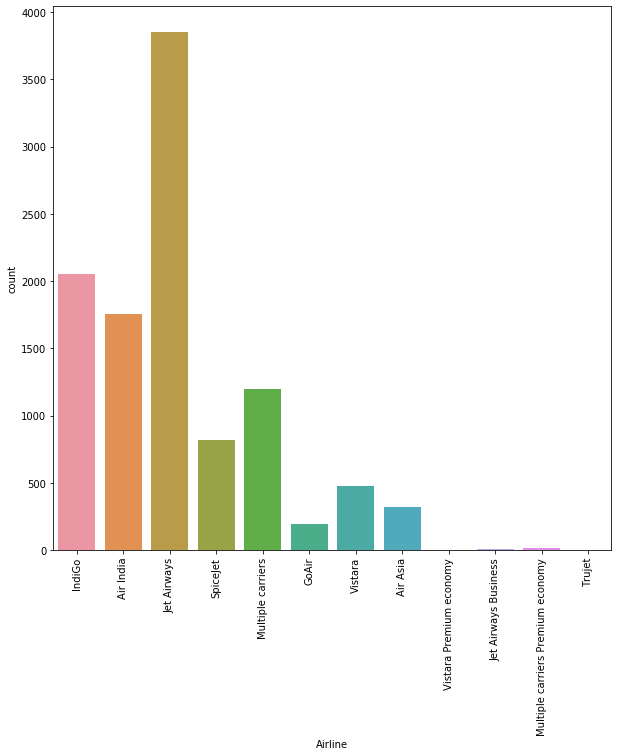

In [31]:
print(df_tr['Airline'].value_counts())
plt.figure(figsize=(10,10))
sns.countplot(df_tr['Airline'])
plt.xticks(rotation=90)
plt.show()

Most of the people prefer to travel with Jet Airways. Least is Trujet

In [32]:
# Checking the Source count
df_tr['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

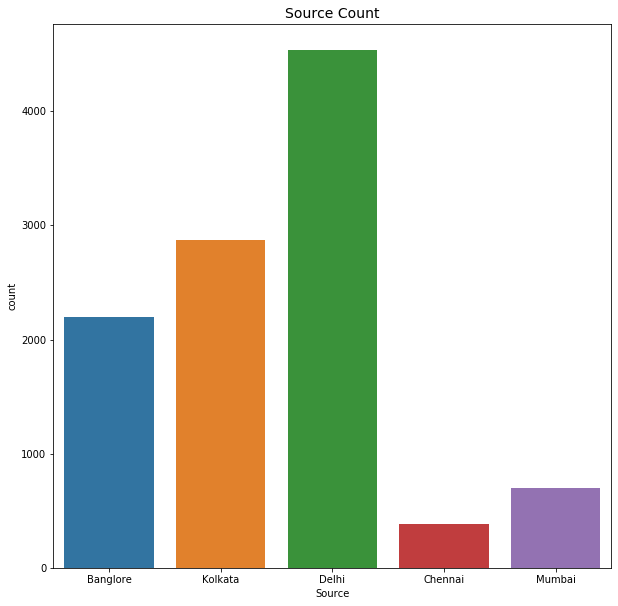

In [33]:
plt.figure(figsize=(10,10))
sns.countplot(df_tr['Source'])
plt.title('Source Count',fontsize=14)
plt.show()

Most of the people from Delhi are travelling in flight than any other country.

In [34]:
#Checking the Destination place count
df_tr['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

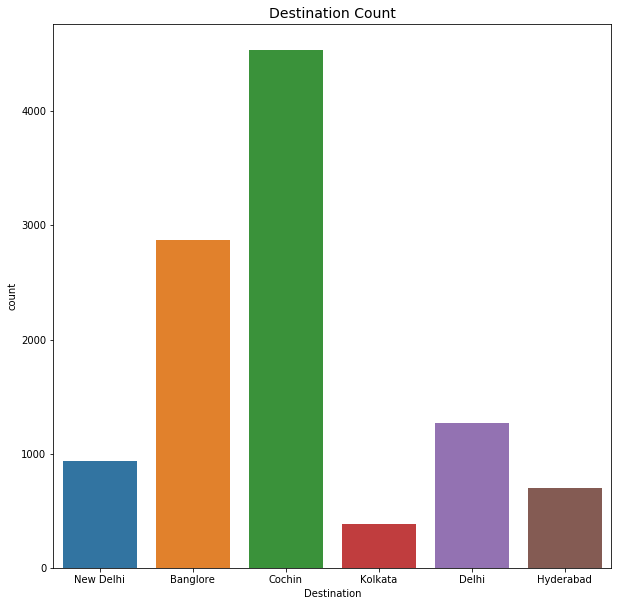

In [35]:
plt.figure(figsize=(10,10))
sns.countplot(df_tr['Destination'])
plt.title('Destination Count',fontsize=14)
plt.show()

Majority of people landing destination is Cochin.

In [36]:
# Checking the Route count
df_tr['Route'].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BOM → RPR → VTZ → HYD             1
BLR → HBX → BOM → BHO → DEL       1
BOM → JLR → HYD                   1
BOM → GOI → HYD                   1
BOM → DED → DEL → HYD             1
Name: Route, Length: 128, dtype: int64

Manjority of people travel in this route Delhi-Bombay-Cochin. It has a high count 2376

In [37]:
# Checking the total stops counts
df_tr['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [38]:
df_tr['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [39]:
# Let's drop the Additional Info Column, as it didn't contribute much

df_tr=df_tr.drop('Additional_Info',axis=1)

In [40]:
# Checking the unique price value

df_tr['Price'].unique()

array([ 3897,  7662, 13882, ...,  9790, 12352, 12648], dtype=int64)

In [41]:
# Checking the statistical summary of data
df_tr.describe()

,Price,Journey_Day,Journey_Month,Dept_Minutes,Dept_Hours,Arrival Minutes,Arrival Hours
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,9087.064121,12.682205,5.534775,24.411214,12.490686,24.690630,13.348778
std,4611.359167,8.803701,2.987489,18.767980,5.748650,16.506036,6.859125
min,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5277.000000,5.000000,3.000000,5.000000,8.000000,10.000000,8.000000
50%,8372.000000,6.000000,5.000000,25.000000,11.000000,25.000000,14.000000
75%,12373.000000,21.000000,6.000000,40.000000,18.000000,35.000000,19.000000
max,79512.000000,27.000000,12.000000,55.000000,23.000000,55.000000,23.000000


Minimum price is 1759 and Maximum price is 79512

In [42]:
# Checking the null value

df_tr.isnull()

,Airline,Source,Destination,Route,Total_Stops,Price,Journey_Day,Journey_Month,Dept_Minutes,Dept_Hours,Arrival Minutes,Arrival Hours
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False,False
10679,False,False,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,False,False,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,False,False,False


In [43]:
df_tr.isnull().sum()

Airline            0
Source             0
Destination        0
Route              1
Total_Stops        1
Price              0
Journey_Day        0
Journey_Month      0
Dept_Minutes       0
Dept_Hours         0
Arrival Minutes    0
Arrival Hours      0
dtype: int64

Null value is present in Route and Total_Stops. Let' fill the null value with mode, because it is a categorical data

In [44]:
df_tr['Route']=df_tr['Route'].fillna(df_tr['Route'].mode()[0])
df_tr['Total_Stops']=df_tr['Total_Stops'].fillna(df_tr['Total_Stops'].mode()[0])

In [45]:
df_tr.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Total_Stops        0
Price              0
Journey_Day        0
Journey_Month      0
Dept_Minutes       0
Dept_Hours         0
Arrival Minutes    0
Arrival Hours      0
dtype: int64

We have replace the null value with Mode, good to proceed further

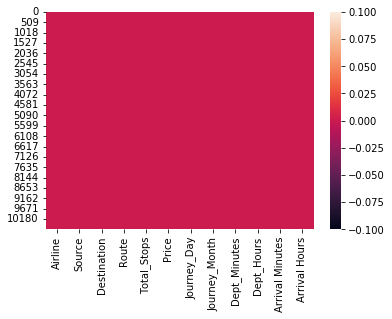

In [46]:
sns.heatmap(df_tr.isnull())

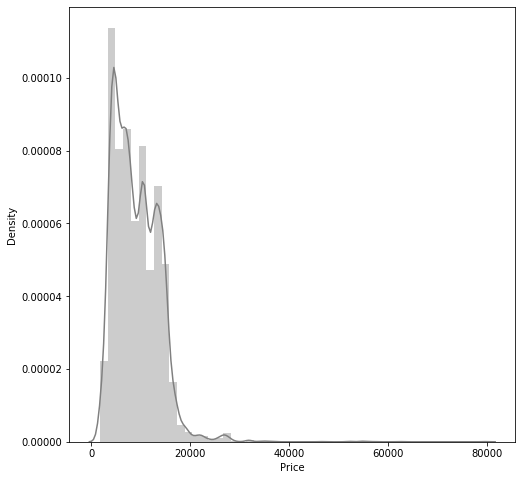

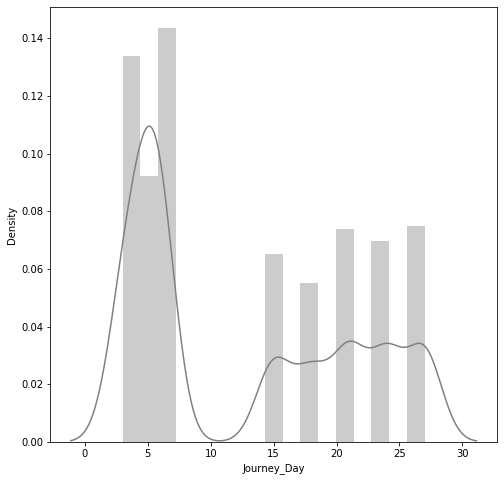

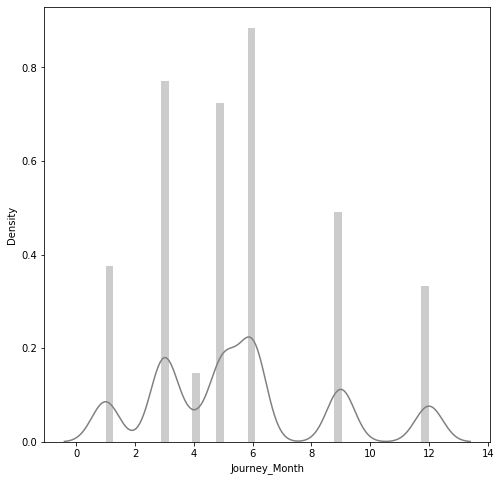

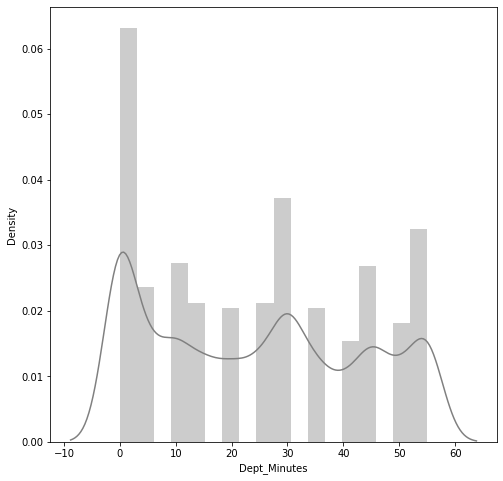

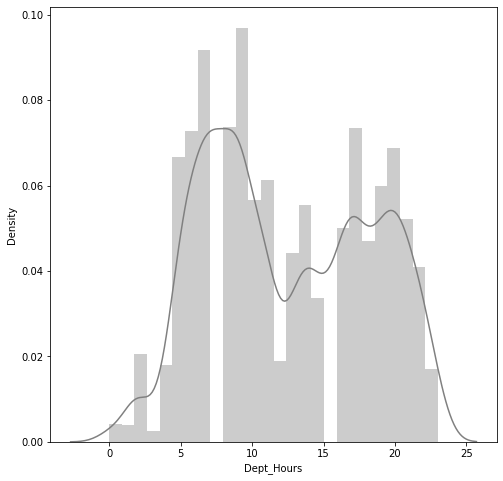

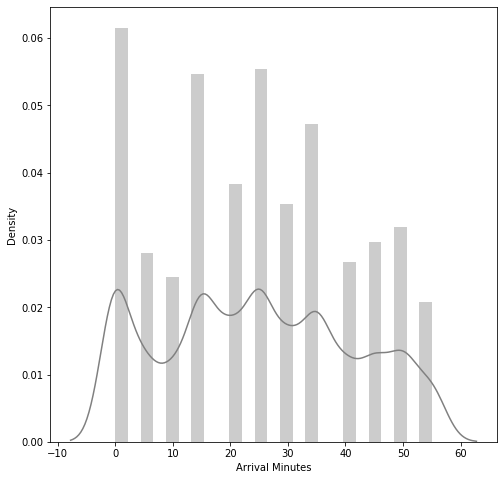

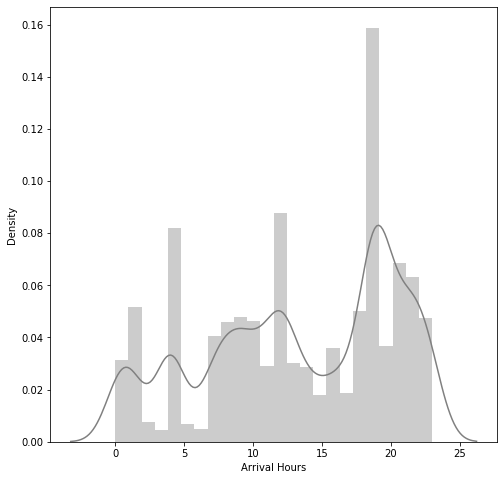

In [47]:
# Distribution plot for Numerical data
for i in df_tr[numerical_data]:
    plt.figure(figsize=(8,8))
    sns.distplot(df_tr[i],color='grey')
    plt.show()

In [48]:
df_tr['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

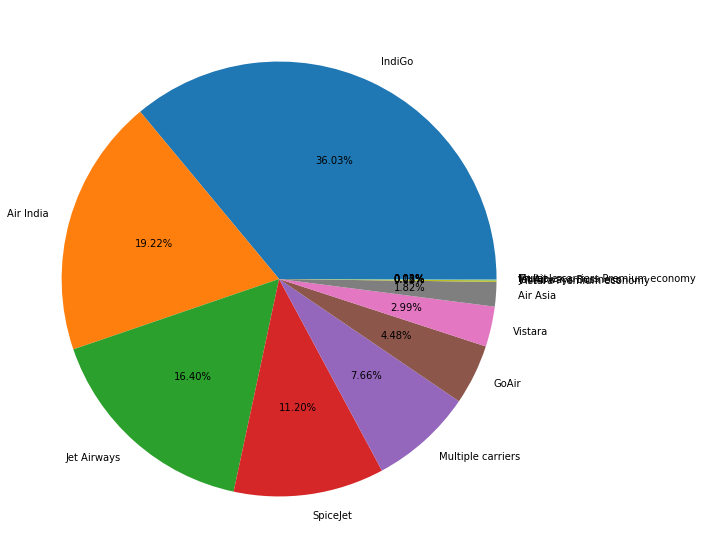

In [49]:
# Viewing the Airline using Pie chart
label=['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet']
figure,axes=plt.subplots(figsize=(10,10))
axes.pie(df_tr['Airline'].value_counts(),labels=label, autopct='%1.2f%%')
plt.show()

In [50]:
df_tr['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


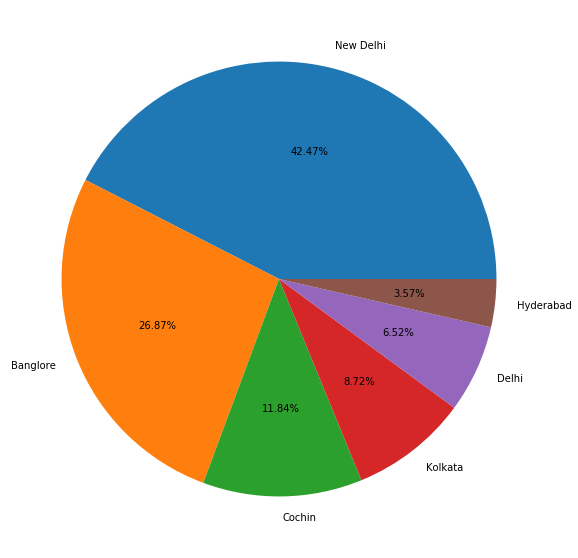

In [51]:
# Viewing the Airline using Pie chart
print(df_tr['Destination'].value_counts())
label=['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad']
figure,axes=plt.subplots(figsize=(10,10))
axes.pie(df_tr['Destination'].value_counts(),labels=label, autopct='%1.2f%%')
plt.show()

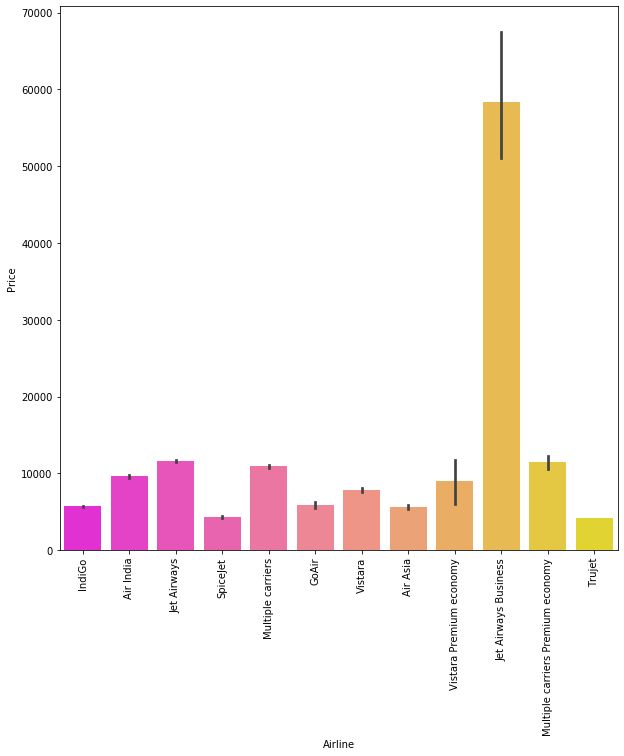

In [52]:
# Checking the price of Airlines using barplot
plt.figure(figsize=(10,10))
sns.barplot(df_tr['Airline'],df_tr['Price'],data=df_tr,palette='spring')
plt.xticks(rotation=90)
plt.show()

Jet Airways business price is high as compare with other airlines

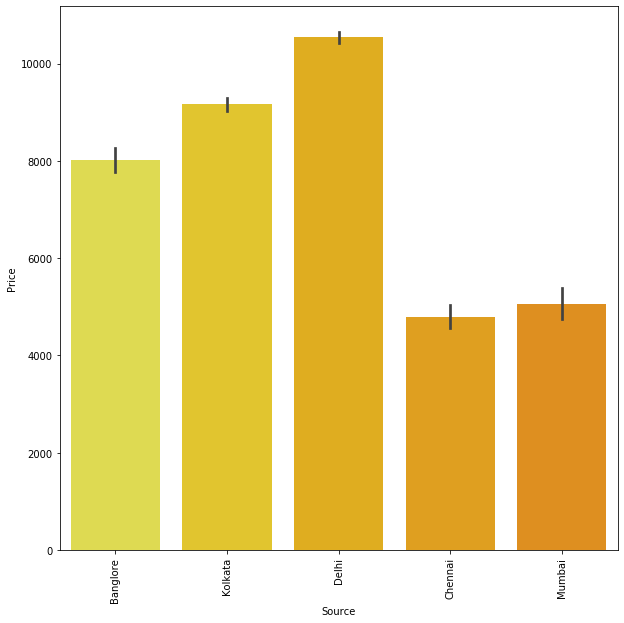

In [53]:
# Checking the price in Source
plt.figure(figsize=(10,10))
sns.barplot(df_tr['Source'],df_tr['Price'],data=df_tr,palette='Wistia')
plt.xticks(rotation=90)
plt.show()

The price to travel Delhi in Flight is high. 

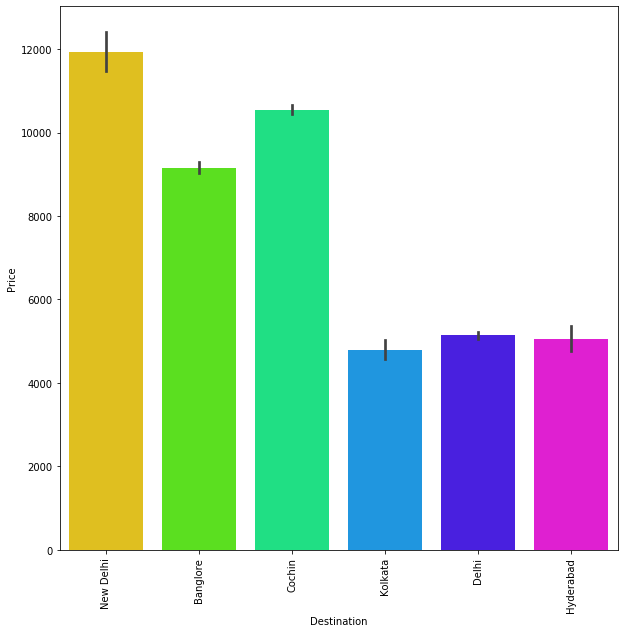

In [54]:
# Checking the price in Destination

plt.figure(figsize=(10,10))
sns.barplot(df_tr['Destination'],df_tr['Price'],data=df_tr,palette='hsv')
plt.xticks(rotation=90)
plt.show()

The Destination New Delhi and Cochin price is high

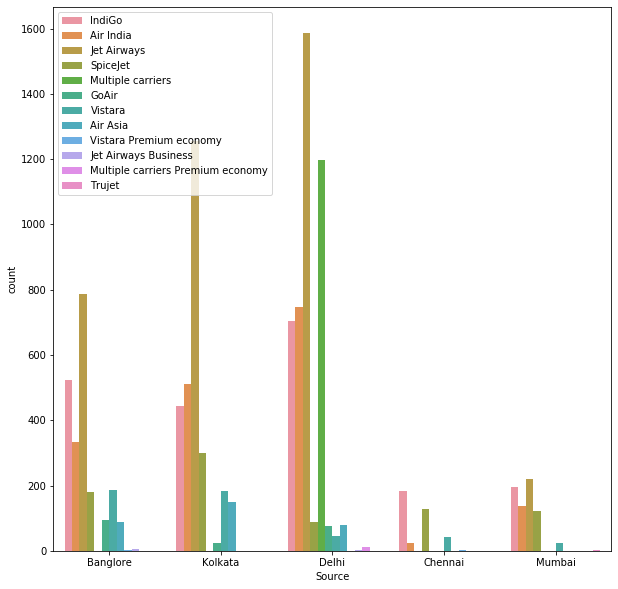

In [55]:
plt.figure(figsize=(10,10))
sns.countplot(df_tr['Source'],hue='Airline',data=df_tr)
plt.legend()
plt.show()

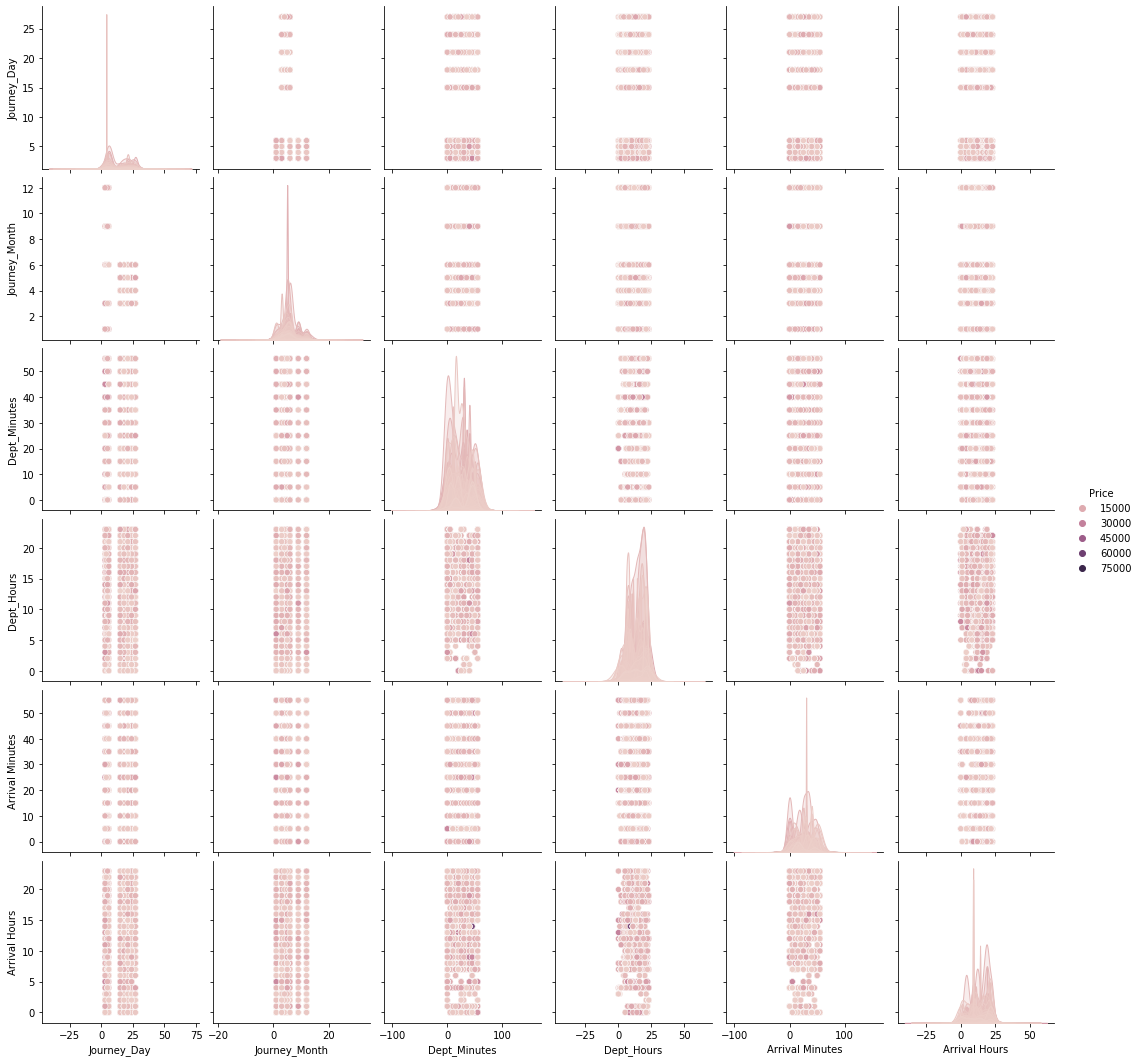

In [56]:
#Vewing the pairplot of each feature comparison with price
sns.pairplot(df_tr,hue='Price',data=df_tr)
plt.show()

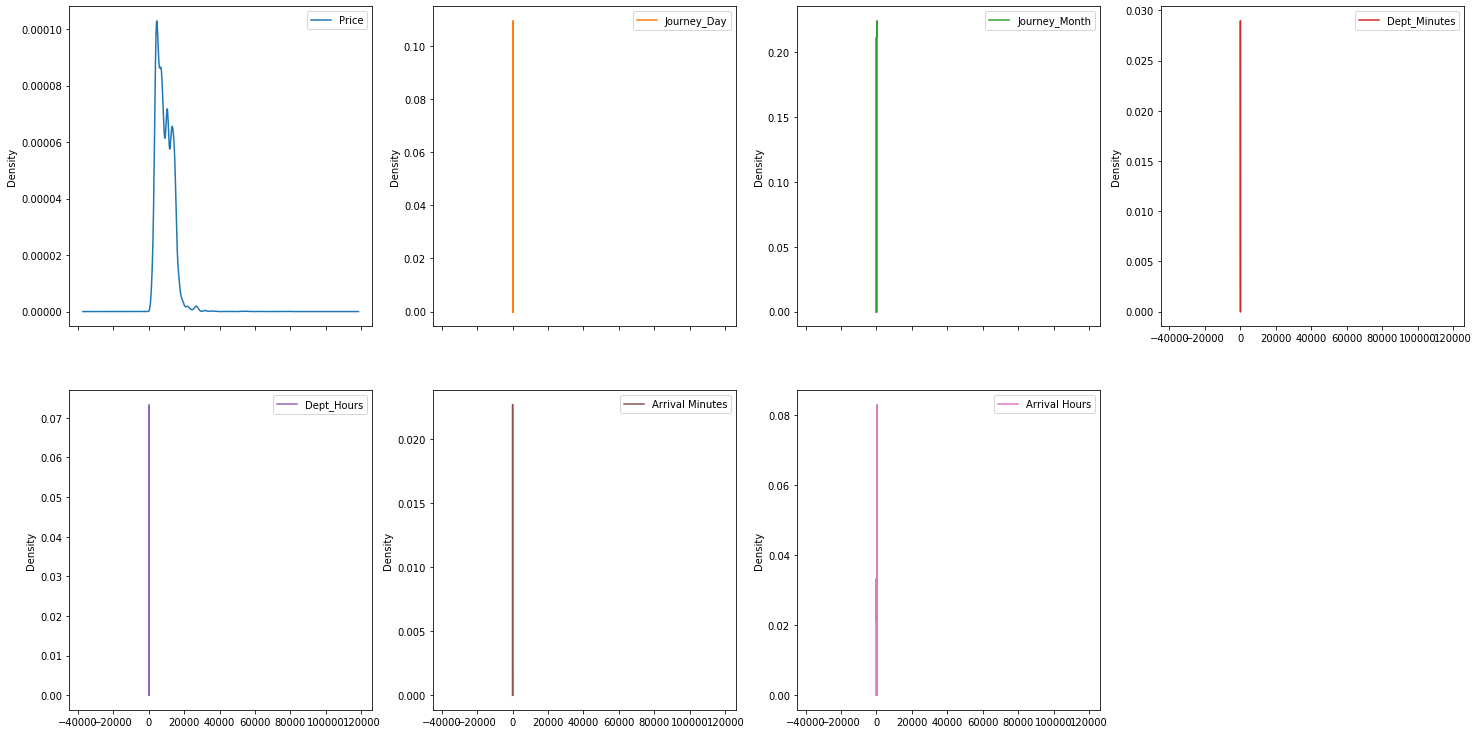

In [57]:
# Viewing the density using kde plot
df_tr.plot(kind='kde',subplots=True,layout=(3,4),figsize=(25,20))
plt.show()

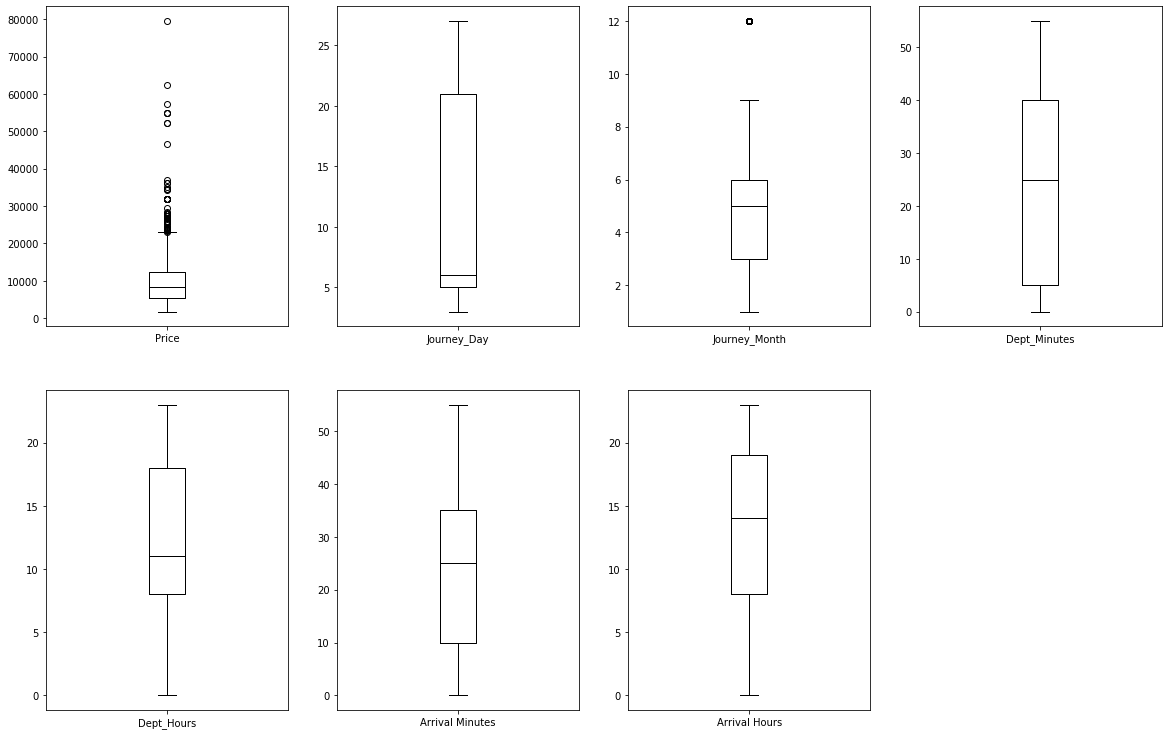

In [58]:
df_tr.plot(kind='box',subplots=True,layout=(3,4),figsize=(20,20),color='black')
plt.show()

Outliers is present in the target variable Price and Journey Month

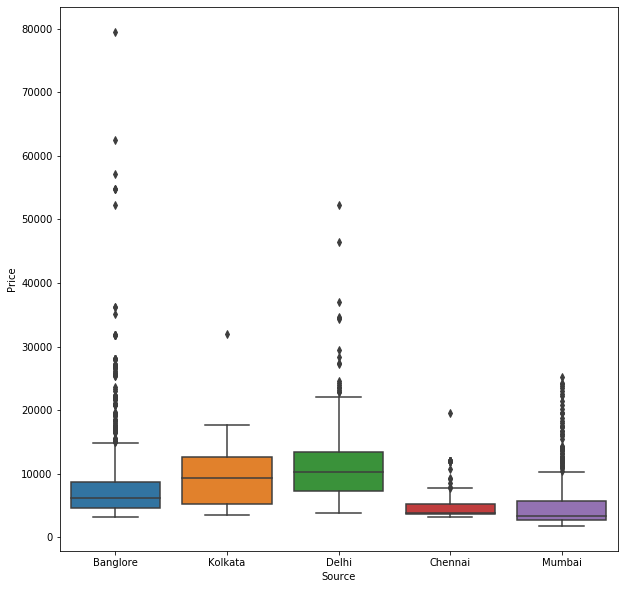

In [59]:
plt.figure(figsize=(10,10))
sns.boxplot(df_tr['Source'],df_tr['Price'])
plt.show()

Outliers is present in all the source column

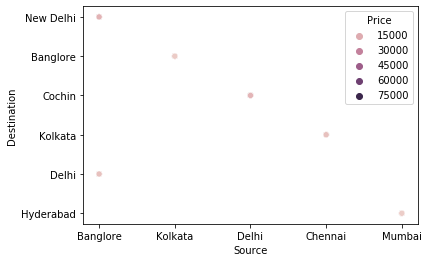

In [60]:
sns.scatterplot(x='Source',y='Destination',hue='Price',data=df_tr)
plt.show()

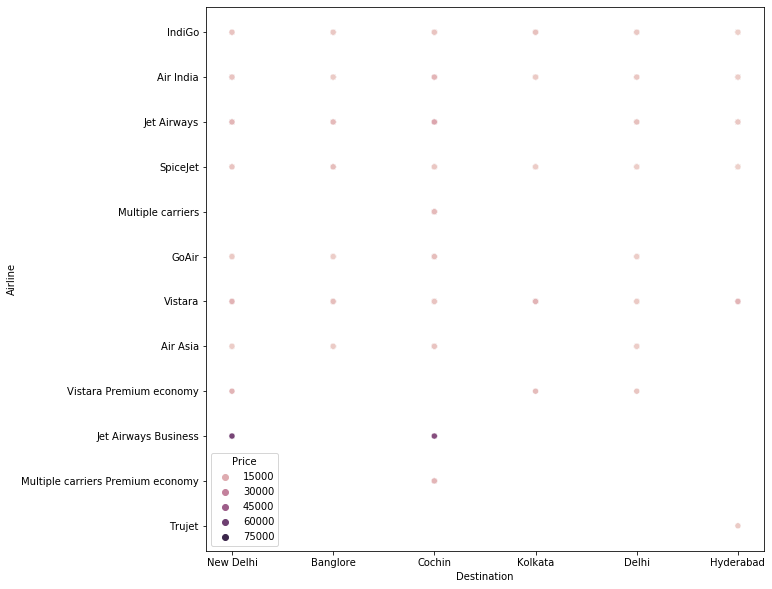

In [61]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Destination',y='Airline',hue='Price',data=df_tr)
plt.show()

Jet Airway Business price is high, it is the expensive Airline.

In [62]:
df_tr.columns


Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Price',
       'Journey_Day', 'Journey_Month', 'Dept_Minutes', 'Dept_Hours',
       'Arrival Minutes', 'Arrival Hours'],
      dtype='object')

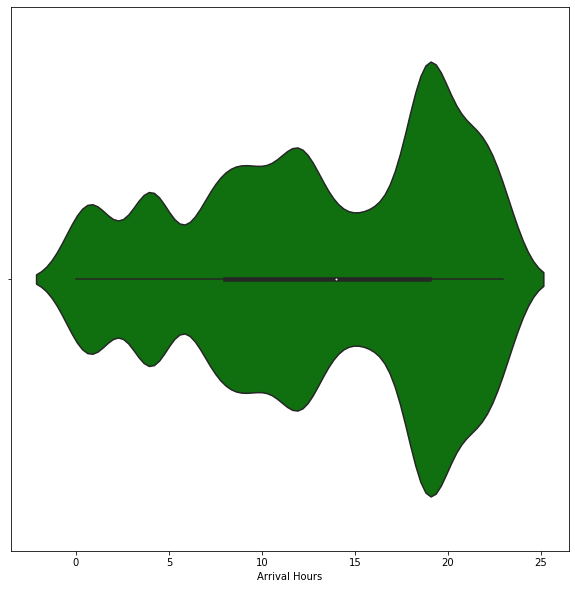

In [63]:
plt.figure(figsize=(10,10))
sns.violinplot(x='Arrival Hours',hue='Price',data=df_tr,color='green')
plt.show()

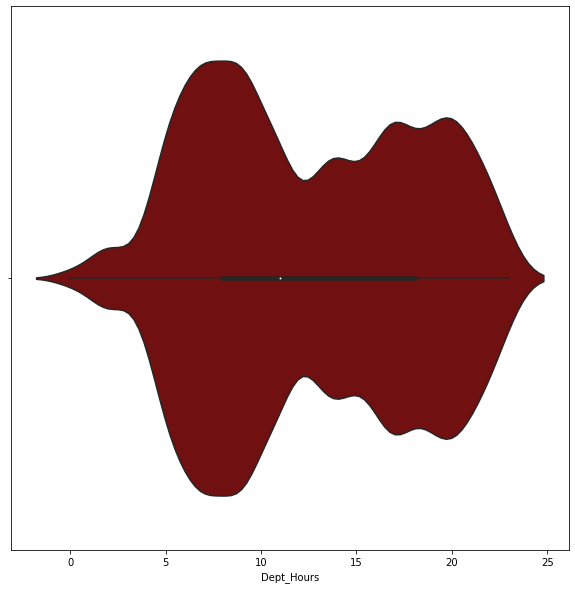

In [64]:
plt.figure(figsize=(10,10))
sns.violinplot(x='Dept_Hours',hue='Price',data=df_tr,color='maroon')
plt.show()

In Departure Hour the range 5 to 10 high

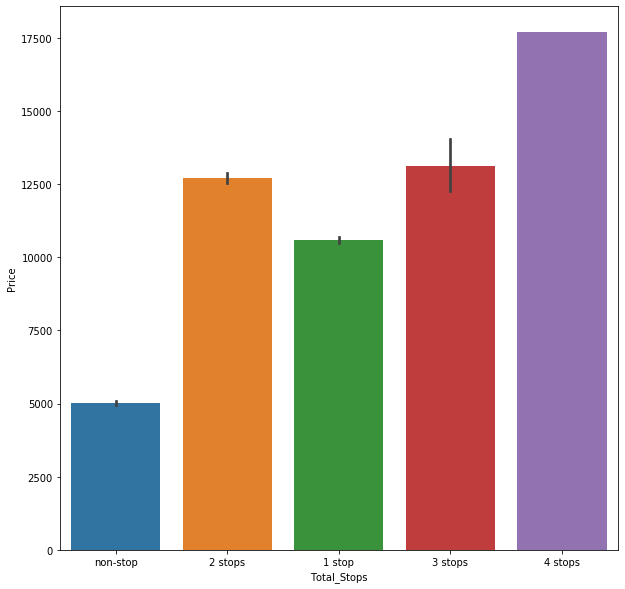

In [65]:
plt.figure(figsize=(10,10))
sns.barplot(x='Total_Stops',y='Price',data=df_tr)
plt.show()

The price is high in 4 stops, the distance is high so, obviously price also high.

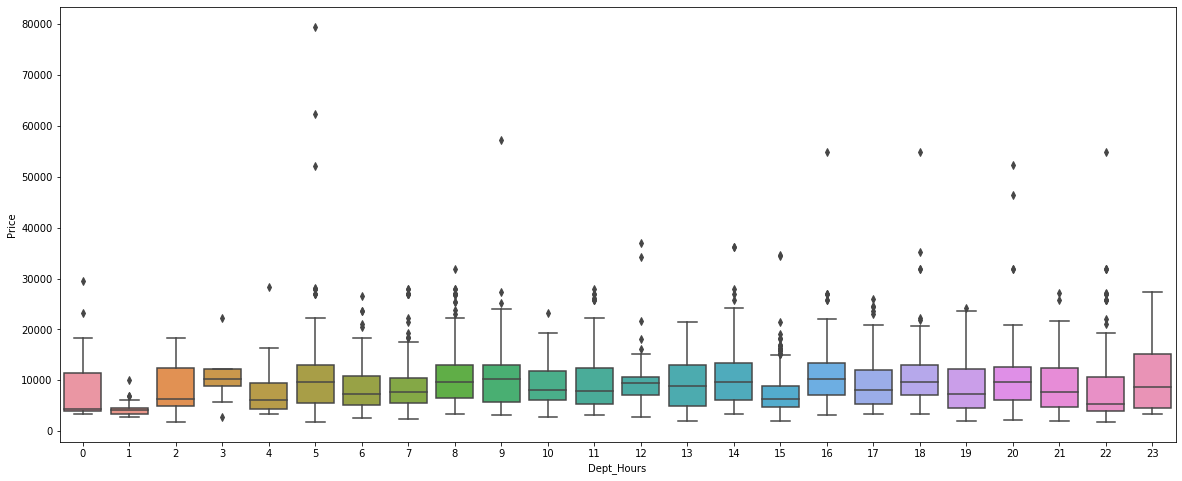

In [66]:
#Viewing the boxplot for Dept Hours and Price
plt.figure(figsize=(20,8))
sns.boxplot(x='Dept_Hours',y='Price',data=df_tr)
plt.show()

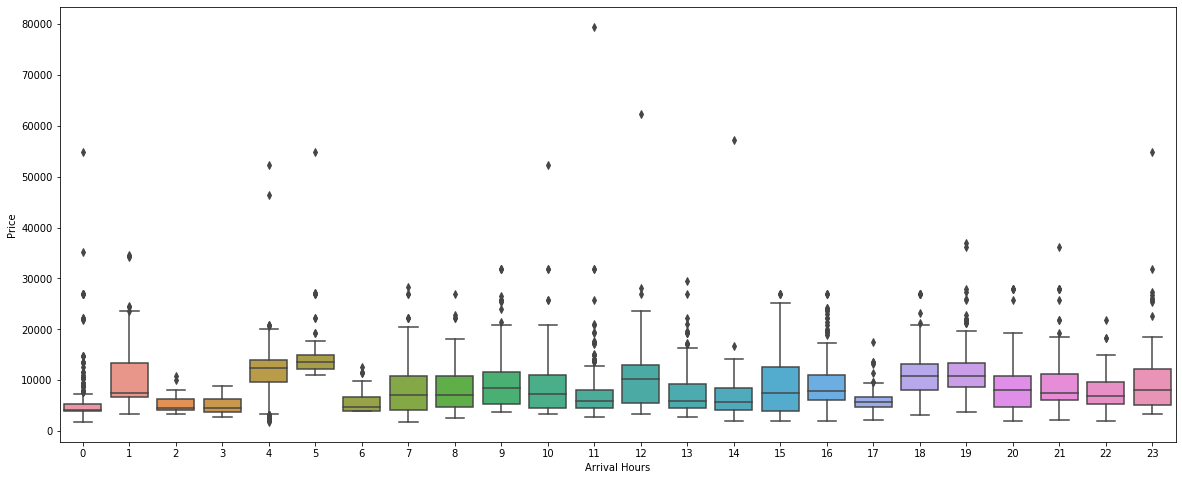

In [67]:
#Viewing the boxplot for Arrival Hours and Price
plt.figure(figsize=(20,8))
sns.boxplot(x='Arrival Hours',y='Price',data=df_tr)
plt.show()

In [68]:
df_tr['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [69]:
#We can assign value to Total stops
df_tr=df_tr.replace({'non-stop':0,'2 stops':1,'1 stop':2,'3 stops':3,'4 stops':4})

In [70]:
df_tr.head(2)

,Airline,Source,Destination,Route,Total_Stops,Price,Journey_Day,Journey_Month,Dept_Minutes,Dept_Hours,Arrival Minutes,Arrival Hours
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,3897,24,3,20,22,10,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,1,7662,5,1,50,5,15,13


# Outliers

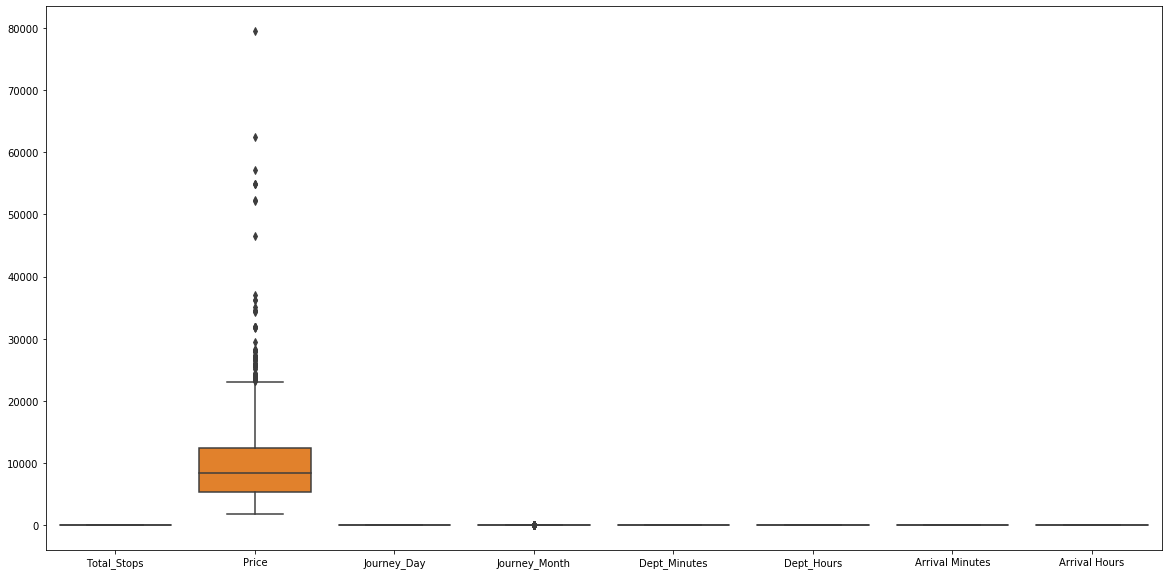

In [71]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df_tr)
plt.show()

Outliers is present in Price and Journey_Month. Lets remove the Outliers using zscore method

In [72]:
outlier=df_tr[['Price','Journey_Month']]

In [73]:
z=np.abs(zscore(outlier))
z

array([[1.12554821, 0.84850298],
       [0.30904789, 1.5179928 ],
       [1.03985835, 1.15996647],
       ...,
       [0.40295085, 0.51375808],
       [0.77224576, 1.5179928 ],
       [0.57815073, 1.15996647]])

In [74]:
threshold=3
new_df_tr=df_tr[(z<3).all(axis=1)]

In [75]:
new_df_tr

,Airline,Source,Destination,Route,Total_Stops,Price,Journey_Day,Journey_Month,Dept_Minutes,Dept_Hours,Arrival Minutes,Arrival Hours
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,3897,24,3,20,22,10,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,1,7662,5,1,50,5,15,13
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1,13882,6,9,25,9,25,4
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2,6218,5,12,5,18,30,23
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2,13302,3,1,50,16,35,21
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,0,4107,4,9,55,19,25,22
10679,Air India,Kolkata,Banglore,CCU → BLR,0,4145,27,4,45,20,20,23
10680,Jet Airways,Banglore,Delhi,BLR → DEL,0,7229,27,4,20,8,20,11
10681,Vistara,Banglore,New Delhi,BLR → DEL,0,12648,3,1,30,11,10,14


In [76]:
df_tr.shape #Before removing the outliers

(10683, 12)

In [77]:
new_df_tr.shape #After removing the outliers

(10587, 12)

In [78]:
data_loss=((10683-10587)/10683)*100

In [79]:
data_loss

0.8986239820275204

0.8% percent data is removed in the Outliers

# Skewness

In [80]:
new_df_tr.skew()

Total_Stops       -0.375796
Price              0.412076
Journey_Day        0.355289
Journey_Month      0.635409
Dept_Minutes       0.173774
Dept_Hours         0.112397
Arrival Minutes    0.110440
Arrival Hours     -0.370888
dtype: float64

The value which is more than -0.5 or +0.5 will consider as Skewness. 
Skewness is present in Journey Month, lets remove it using yeo-johnson method



In [81]:
skewed=['Journey_Month']

from sklearn.preprocessing import PowerTransformer
scaled=PowerTransformer(method='yeo-johnson')

In [82]:
new_df_tr[skewed]=scaled.fit_transform(new_df_tr[skewed].values)

In [83]:
new_df_tr.skew()

Total_Stops       -0.375796
Price              0.412076
Journey_Day        0.355289
Journey_Month     -0.023703
Dept_Minutes       0.173774
Dept_Hours         0.112397
Arrival Minutes    0.110440
Arrival Hours     -0.370888
dtype: float64

Skewness has been removed

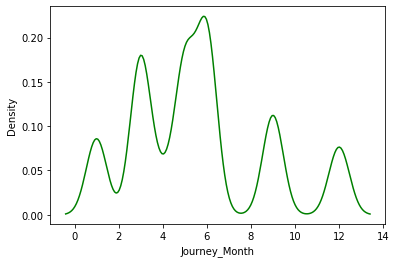

In [84]:
sns.distplot(df_tr['Journey_Month'],hist=False,color='green')  #Viewing the distribution plot before removing the skewness
plt.show()

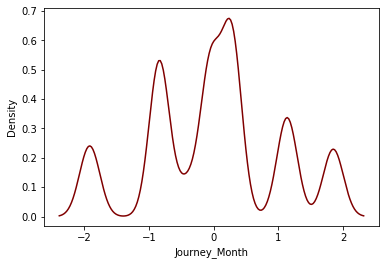

In [85]:
sns.distplot(new_df_tr['Journey_Month'],hist=False,color='maroon')  # Viewing the distribution plot after removing the skewness
plt.show()

# Let's convert the categorical data to Numerical data using Label Encoder

In [86]:
categorical_data=[]
for i in new_df_tr.dtypes.index:
    if new_df_tr.dtypes[i]=='object':
        categorical_data.append(i)
print(categorical_data)

['Airline', 'Source', 'Destination', 'Route']


In [87]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
new_df_tr[categorical_data]=new_df_tr[categorical_data].apply(le.fit_transform)

In [88]:
new_df_tr[categorical_data]

,Airline,Source,Destination,Route
0,3,0,5,18
1,1,3,0,81
2,4,2,1,115
3,3,3,0,88
4,3,0,5,29
...,...,...,...,...
10678,0,3,0,61
10679,1,3,0,61
10680,4,0,2,18
10681,9,0,5,18


We have successfully converted categorical data to numerical data

# Correlation

In [89]:
# Checking the correlation

df_tr_corr=new_df_tr.corr()
df_tr_corr

,Airline,Source,Destination,Route,Total_Stops,Price,Journey_Day,Journey_Month,Dept_Minutes,Dept_Hours,Arrival Minutes,Arrival Hours
Airline,1.000000,-0.015071,0.025405,-0.000220,-0.001280,-0.029360,0.026333,-0.002342,-0.056771,-0.018586,-0.065389,-0.013136
Source,-0.015071,1.000000,-0.584005,0.381698,0.222961,0.075410,-0.003060,0.044826,-0.050704,0.059562,0.019643,0.025007
Destination,0.025405,-0.584005,1.000000,-0.432504,-0.332877,-0.172556,-0.035786,-0.089351,0.120240,-0.074192,0.018346,-0.040349
Route,-0.000220,0.381698,-0.432504,1.000000,0.401181,0.250445,0.086852,0.042371,-0.059441,-0.079742,-0.178275,0.013728
Total_Stops,-0.001280,0.222961,-0.332877,0.401181,1.000000,0.558370,-0.043105,0.056119,-0.061434,-0.038827,-0.181618,0.109982
Price,-0.029360,0.075410,-0.172556,0.250445,0.558370,1.000000,-0.143236,0.066387,-0.053442,0.007017,-0.098482,0.037523
Journey_Day,0.026333,-0.003060,-0.035786,0.086852,-0.043105,-0.143236,1.000000,-0.190192,-0.012547,-0.003359,-0.021027,-0.003046
Journey_Month,-0.002342,0.044826,-0.089351,0.042371,0.056119,0.066387,-0.190192,1.000000,0.003503,0.024232,-0.033225,-0.005864
Dept_Minutes,-0.056771,-0.050704,0.120240,-0.059441,-0.061434,-0.053442,-0.012547,0.003503,1.000000,-0.026096,-0.017159,0.044542
Dept_Hours,-0.018586,0.059562,-0.074192,-0.079742,-0.038827,0.007017,-0.003359,0.024232,-0.026096,1.000000,0.068025,0.007856


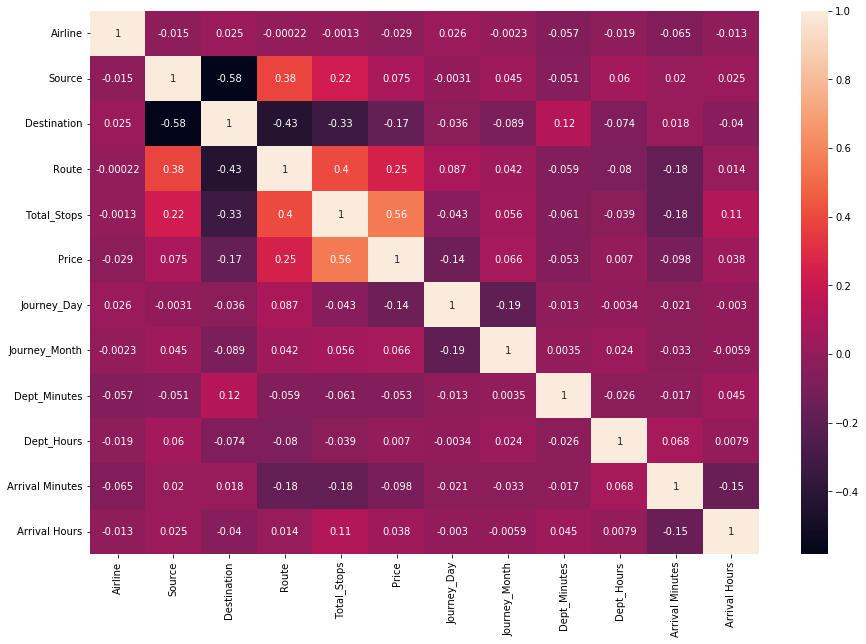

In [90]:
plt.figure(figsize=(15,10))
sns.heatmap(new_df_tr.corr(),annot=True)
plt.show()

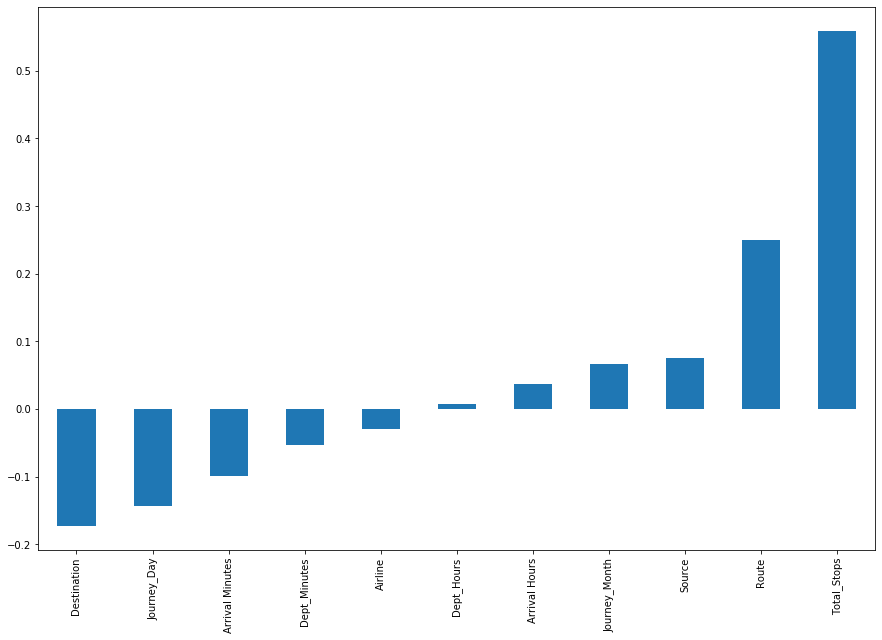

In [91]:
plt.figure(figsize=(15,10))
new_df_tr.corr()['Price'].sort_values(ascending=True).drop(['Price']).plot(kind='bar')
plt.show()

# Exploratory Data Analysis(EDA) and Visualization for test data set

In [92]:
df_te

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [93]:
df_te.shape

(2671, 10)

In test data set there 2671 rows and 10 columns

In [94]:
#Checking the count of each features
for i in df_te.columns:
    print(df_te[i].value_counts())
    print("*********************************************")

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64
*********************************************
9/05/2019     144
12/06/2019    135
18/05/2019    129
6/06/2019     127
9/06/2019     119
21/05/2019    118
15/05/2019    106
15/06/2019    105
6/03/2019      97
21/03/2019     93
3/06/2019      92
1/06/2019      88
24/06/2019     85
1/04/2019      78
24/03/2019     78
27/06/2019     75
6/05/2019      73
24/05/2019     71
12/05/2019     68
27/03/2019     65
27/05/2019     65
1/05/2019      62
3/03/2019      62
9/03/2019      55
12/03/2019     43
18/03/2019     41
01/03/2

In [95]:
df_te.sample(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
898,Jet Airways,6/06/2019,Banglore,Delhi,BLR → DEL,06:00,08:45,2h 45m,non-stop,In-flight meal not included
1379,Air India,15/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,05:00,19:15 16 Jun,38h 15m,2 stops,No info
1064,Multiple carriers,6/03/2019,Delhi,Cochin,DEL → BOM → COK,07:05,19:15,12h 10m,1 stop,No info


Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64


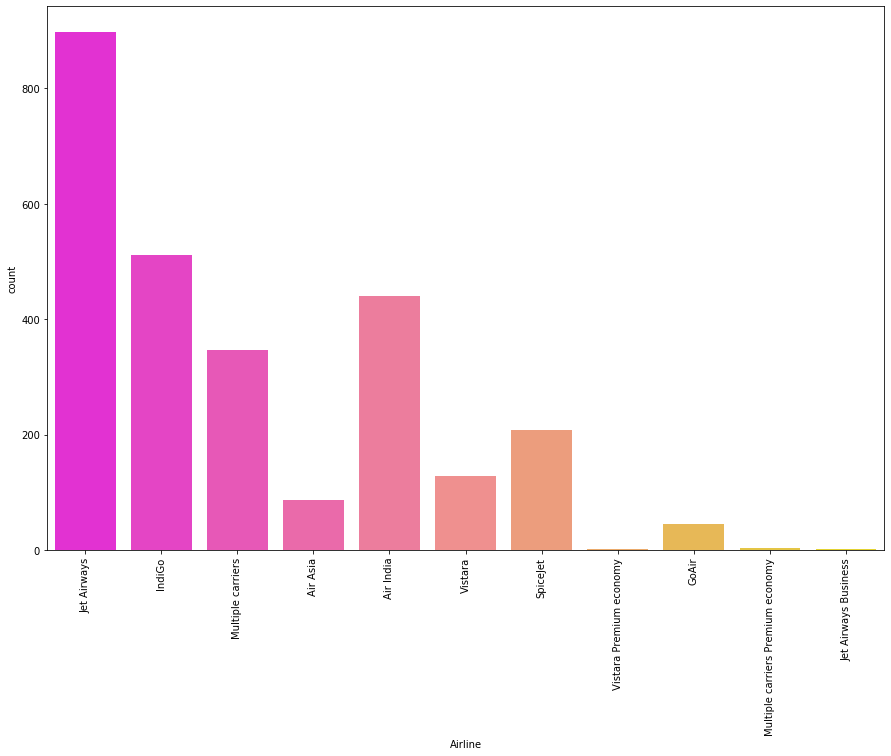

In [96]:
print(df_te['Airline'].value_counts())
plt.figure(figsize=(15,10))
sns.countplot(df_te['Airline'],palette='spring')
plt.xticks(rotation=90)
plt.show()

Jet Airway count is high. It clearly shows majority of people used to travel in Jet Airways

In [97]:
#
df_te.nunique()

Airline             11
Date_of_Journey     44
Source               5
Destination          6
Route              100
Dep_Time           199
Arrival_Time       704
Duration           320
Total_Stops          5
Additional_Info      6
dtype: int64

In [98]:
df_te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [99]:
#Lets convert the Date_of_Journey to date time data type

df_te['Journey_Day']=pd.to_datetime(df_te.Date_of_Journey,format='%d/%m/%Y').dt.day
df_te['Journey_Month']=pd.to_datetime(df_te.Date_of_Journey,format='%d/%m/%Y').dt.month
df_te['Journey_Year']=pd.to_datetime(df_te.Date_of_Journey,format='%d/%m/%Y').dt.year

In [100]:
# Lets convert the Dep_Time to date time data type

df_te['Dep_Minute']=pd.to_datetime(df_te.Dep_Time).dt.minute
df_te['Dep_Hour']=pd.to_datetime(df_te.Dep_Time).dt.hour

In [101]:
# Lets convert the Arrival_Time to date time data type

df_te['Arrival_Minute']=pd.to_datetime(df_te.Arrival_Time).dt.minute
df_te['Arrival_Hour']=pd.to_datetime(df_te.Arrival_Time).dt.hour

In [102]:
df_te.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Journey_Day         int64
Journey_Month       int64
Journey_Year        int64
Dep_Minute          int64
Dep_Hour            int64
Arrival_Minute      int64
Arrival_Hour        int64
dtype: object

In [103]:
# Let's drop the unnecessary column

df_te=df_te.drop(columns=['Date_of_Journey','Dep_Time','Arrival_Time','Duration','Journey_Year'],axis=1)

In [104]:
df_te.shape

(2671, 12)

In [105]:
df_te['Total_Stops'].unique()

array(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'],
      dtype=object)

In [106]:
# Let's assign value to Total Stops
df_te.replace({"non-stop": 0,"1 stop": 1,"2 stops": 2,"3 stops": 3,"4 stops": 4},inplace = True)

In [107]:
df_te.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Minute,Dep_Hour,Arrival_Minute,Arrival_Hour
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1,No info,6,6,30,17,25,4
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1,No info,12,5,20,6,20,10
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1,In-flight meal not included,21,5,15,19,0,19
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1,No info,21,5,0,8,0,21
4,Air Asia,Banglore,Delhi,BLR → DEL,0,No info,24,6,55,23,45,2


In [108]:
# Checking the Statistical summary of data

df_te.describe(include='all')

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Minute,Dep_Hour,Arrival_Minute,Arrival_Hour
count,2671,2671,2671,2671,2671.000000,2671,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000
unique,11,5,6,100,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN
top,Jet Airways,Delhi,Cochin,DEL → BOM → COK,NaN,No info,NaN,NaN,NaN,NaN,NaN,NaN
freq,897,1145,1145,624,NaN,2148,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,0.833396,NaN,12.915762,4.718458,24.891426,12.603519,24.558218,13.585174
std,NaN,NaN,NaN,NaN,0.672315,NaN,8.260824,1.170851,19.086522,5.686673,16.775436,7.040396
min,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,0.000000,NaN,6.000000,3.000000,5.000000,8.000000,10.000000,8.000000
50%,NaN,NaN,NaN,NaN,1.000000,NaN,12.000000,5.000000,25.000000,12.000000,25.000000,15.000000
75%,NaN,NaN,NaN,NaN,1.000000,NaN,21.000000,6.000000,45.000000,18.000000,35.000000,19.000000


In [109]:
df_te.describe()

,Total_Stops,Journey_Day,Journey_Month,Dep_Minute,Dep_Hour,Arrival_Minute,Arrival_Hour
count,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000
mean,0.833396,12.915762,4.718458,24.891426,12.603519,24.558218,13.585174
std,0.672315,8.260824,1.170851,19.086522,5.686673,16.775436,7.040396
min,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.000000,3.000000,5.000000,8.000000,10.000000,8.000000
50%,1.000000,12.000000,5.000000,25.000000,12.000000,25.000000,15.000000
75%,1.000000,21.000000,6.000000,45.000000,18.000000,35.000000,19.000000
max,4.000000,27.000000,6.000000,55.000000,23.000000,55.000000,23.000000


In [110]:
# Checking the missing value

df_te.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Total_Stops        0
Additional_Info    0
Journey_Day        0
Journey_Month      0
Dep_Minute         0
Dep_Hour           0
Arrival_Minute     0
Arrival_Hour       0
dtype: int64

There is no missing value present in the Test dataset

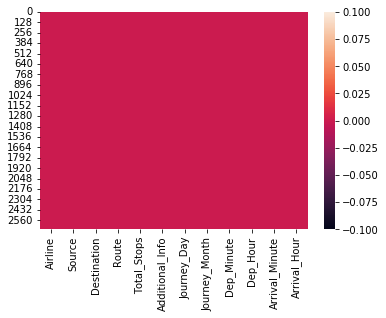

In [111]:
sns.heatmap(df_te.isnull())
plt.show()

# Outliers

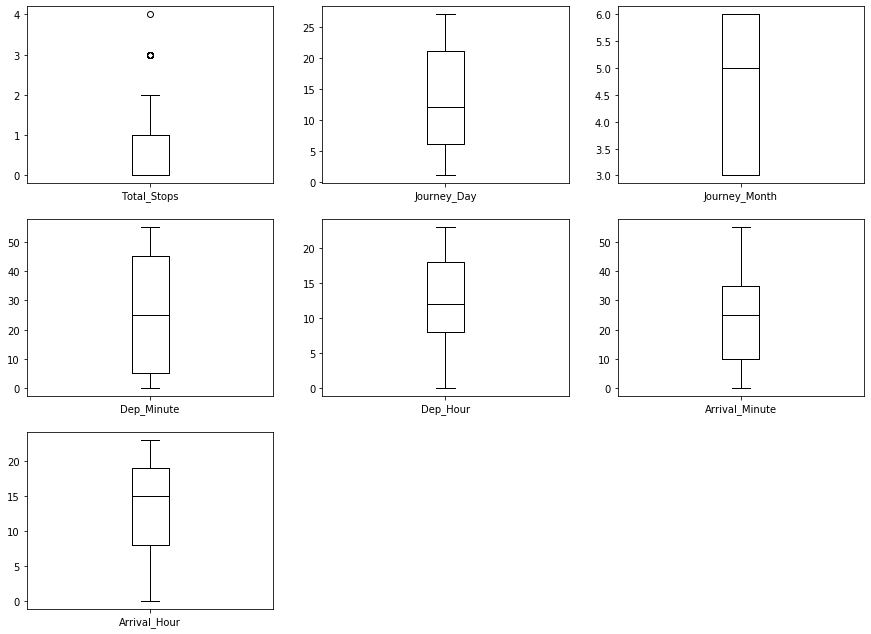

In [112]:

df_te.plot(kind='box',subplots=True,layout=(4,3),color='black',figsize=(15,15))
plt.show()

Outlier is present in Total Stops. lets remove the ouliers using the zscore

In [113]:
df_te.dtypes

Airline            object
Source             object
Destination        object
Route              object
Total_Stops         int64
Additional_Info    object
Journey_Day         int64
Journey_Month       int64
Dep_Minute          int64
Dep_Hour            int64
Arrival_Minute      int64
Arrival_Hour        int64
dtype: object

In [114]:
outliers=df_te[['Total_Stops']]

z=np.abs(zscore(outliers))
z

array([[0.24785314],
       [0.24785314],
       [0.24785314],
       ...,
       [0.24785314],
       [0.24785314],
       [0.24785314]])

In [115]:
threshold=3
new_df=df_te[(z<3).all(axis=1)]
new_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Minute,Dep_Hour,Arrival_Minute,Arrival_Hour
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1,No info,6,6,30,17,25,4
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1,No info,12,5,20,6,20,10
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1,In-flight meal not included,21,5,15,19,0,19
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1,No info,21,5,0,8,0,21
4,Air Asia,Banglore,Delhi,BLR → DEL,0,No info,24,6,55,23,45,2


In [116]:
new_df.shape  #After removing the outlier

(2659, 12)

In [117]:
df_te.shape # Before removing the outlier

(2671, 12)

In [118]:
dataloss=((2671-2659)/2671)*100

In [119]:
dataloss

0.44926993635342566

0.4% data is removed in outlier


# Skewness

In [120]:
new_df.skew()

Total_Stops       0.202178
Journey_Day       0.199729
Journey_Month    -0.407966
Dep_Minute        0.129284
Dep_Hour          0.087838
Arrival_Minute    0.117647
Arrival_Hour     -0.442579
dtype: float64

Skewness is present in Total_Stops, let's remove them using yeo-johnson method

In [121]:
skewed=['Total_Stops']

scaled=PowerTransformer(method='yeo-johnson')
scaled

PowerTransformer()

In [122]:
new_df[skewed]=scaled.fit_transform(new_df[skewed].values)

In [123]:
new_df[skewed]

,Total_Stops
0,0.345942
1,0.345942
2,0.345942
3,0.345942
4,-1.315164
...,...
2666,0.345942
2667,-1.315164
2668,0.345942
2669,0.345942


In [124]:
new_df.skew()

Total_Stops      -0.075457
Journey_Day       0.199729
Journey_Month    -0.407966
Dep_Minute        0.129284
Dep_Hour          0.087838
Arrival_Minute    0.117647
Arrival_Hour     -0.442579
dtype: float64

Skewness is removed from data set

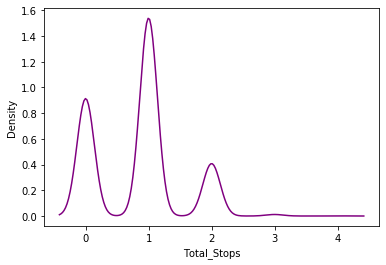

In [125]:
# Viewing the distribution plot before removing the skewness
sns.distplot(df_te['Total_Stops'],hist=False,color='purple')
plt.show()

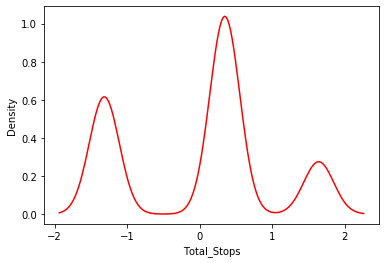

In [126]:
#Viewing the distribution plot after removing the skewness
sns.distplot(new_df['Total_Stops'],hist=False,color='r')
plt.show()

# Converting the categorical data to numerical data using Label Encoder

In [127]:
categorical_data=[]
for i in new_df.dtypes.index:
    if new_df.dtypes[i]=='object':
        categorical_data.append(i)
print(categorical_data)

['Airline', 'Source', 'Destination', 'Route', 'Additional_Info']


In [128]:
le=LabelEncoder()

new_df[categorical_data]=new_df[categorical_data].apply(le.fit_transform)

In [129]:
#Viewing the data after the convertion to numerical data
new_df[categorical_data]

,Airline,Source,Destination,Route,Additional_Info
0,4,2,1,71,5
1,3,3,0,60,5
2,4,2,1,71,3
3,6,2,1,71,5
4,0,0,2,14,5
...,...,...,...,...,...
2666,1,3,0,48,5
2667,3,3,0,40,5
2668,4,2,1,71,5
2669,1,2,1,71,5


In [130]:
new_df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Minute,Dep_Hour,Arrival_Minute,Arrival_Hour
0,4,2,1,71,0.345942,5,6,6,30,17,25,4
1,3,3,0,60,0.345942,5,12,5,20,6,20,10
2,4,2,1,71,0.345942,3,21,5,15,19,0,19
3,6,2,1,71,0.345942,5,21,5,0,8,0,21
4,0,0,2,14,-1.315164,5,24,6,55,23,45,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,48,0.345942,5,6,6,30,20,25,20
2667,3,3,0,40,-1.315164,5,27,3,20,14,55,16
2668,4,2,1,71,0.345942,5,6,3,50,21,25,4
2669,1,2,1,71,0.345942,5,6,3,0,4,15,19


# Correlation

In [131]:
new_df_corr=new_df.corr()
new_df_corr

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Minute,Dep_Hour,Arrival_Minute,Arrival_Hour
Airline,1.000000,-0.031127,0.033935,0.024972,-0.207378,-0.082730,0.002503,0.047793,-0.048190,-0.001572,-0.096377,-0.015285
Source,-0.031127,1.000000,-0.576646,0.347068,0.198628,-0.025330,-0.034123,0.169886,-0.063494,0.056284,-0.009073,0.002082
Destination,0.033935,-0.576646,1.000000,-0.445205,-0.311175,0.026536,-0.009264,-0.353196,0.151630,-0.049382,0.038264,-0.006153
Route,0.024972,0.347068,-0.445205,1.000000,0.473461,0.056870,0.043186,0.235911,-0.043996,-0.135231,-0.215966,0.005800
Total_Stops,-0.207378,0.198628,-0.311175,0.473461,1.000000,-0.070917,-0.023058,0.026875,-0.000630,-0.096018,-0.138092,0.042339
Additional_Info,-0.082730,-0.025330,0.026536,0.056870,-0.070917,1.000000,-0.023900,-0.010229,0.007696,-0.070981,0.033021,0.010876
Journey_Day,0.002503,-0.034123,-0.009264,0.043186,-0.023058,-0.023900,1.000000,-0.024840,-0.008045,-0.022269,-0.002940,0.020064
Journey_Month,0.047793,0.169886,-0.353196,0.235911,0.026875,-0.010229,-0.024840,1.000000,-0.106749,0.013045,-0.146002,-0.001433
Dep_Minute,-0.048190,-0.063494,0.151630,-0.043996,-0.000630,0.007696,-0.008045,-0.106749,1.000000,-0.033772,-0.021920,0.045956
Dep_Hour,-0.001572,0.056284,-0.049382,-0.135231,-0.096018,-0.070981,-0.022269,0.013045,-0.033772,1.000000,0.069790,0.001302


There is no high correlation exist in data, there is no mulitcollinearity

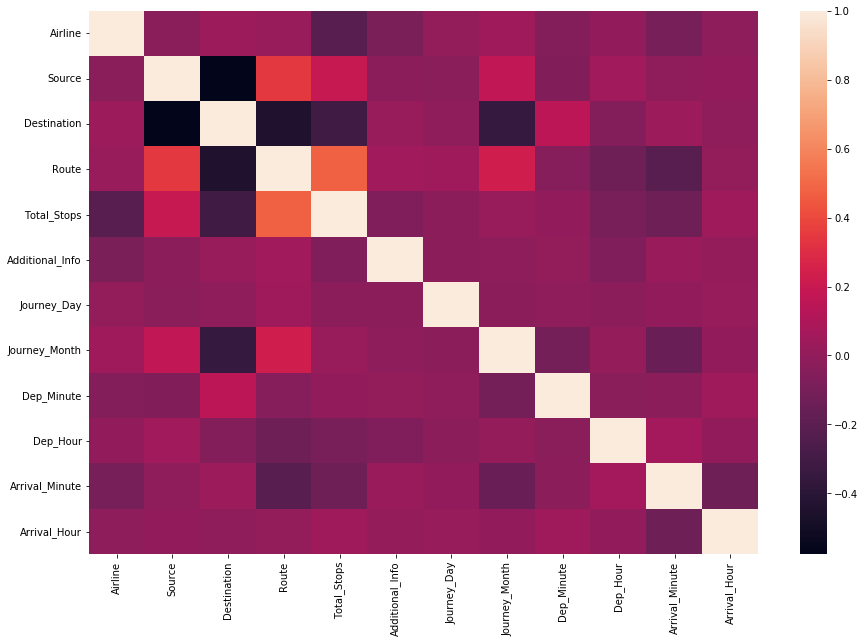

In [132]:
plt.figure(figsize=(15,10))
sns.heatmap(new_df_corr)
plt.show()

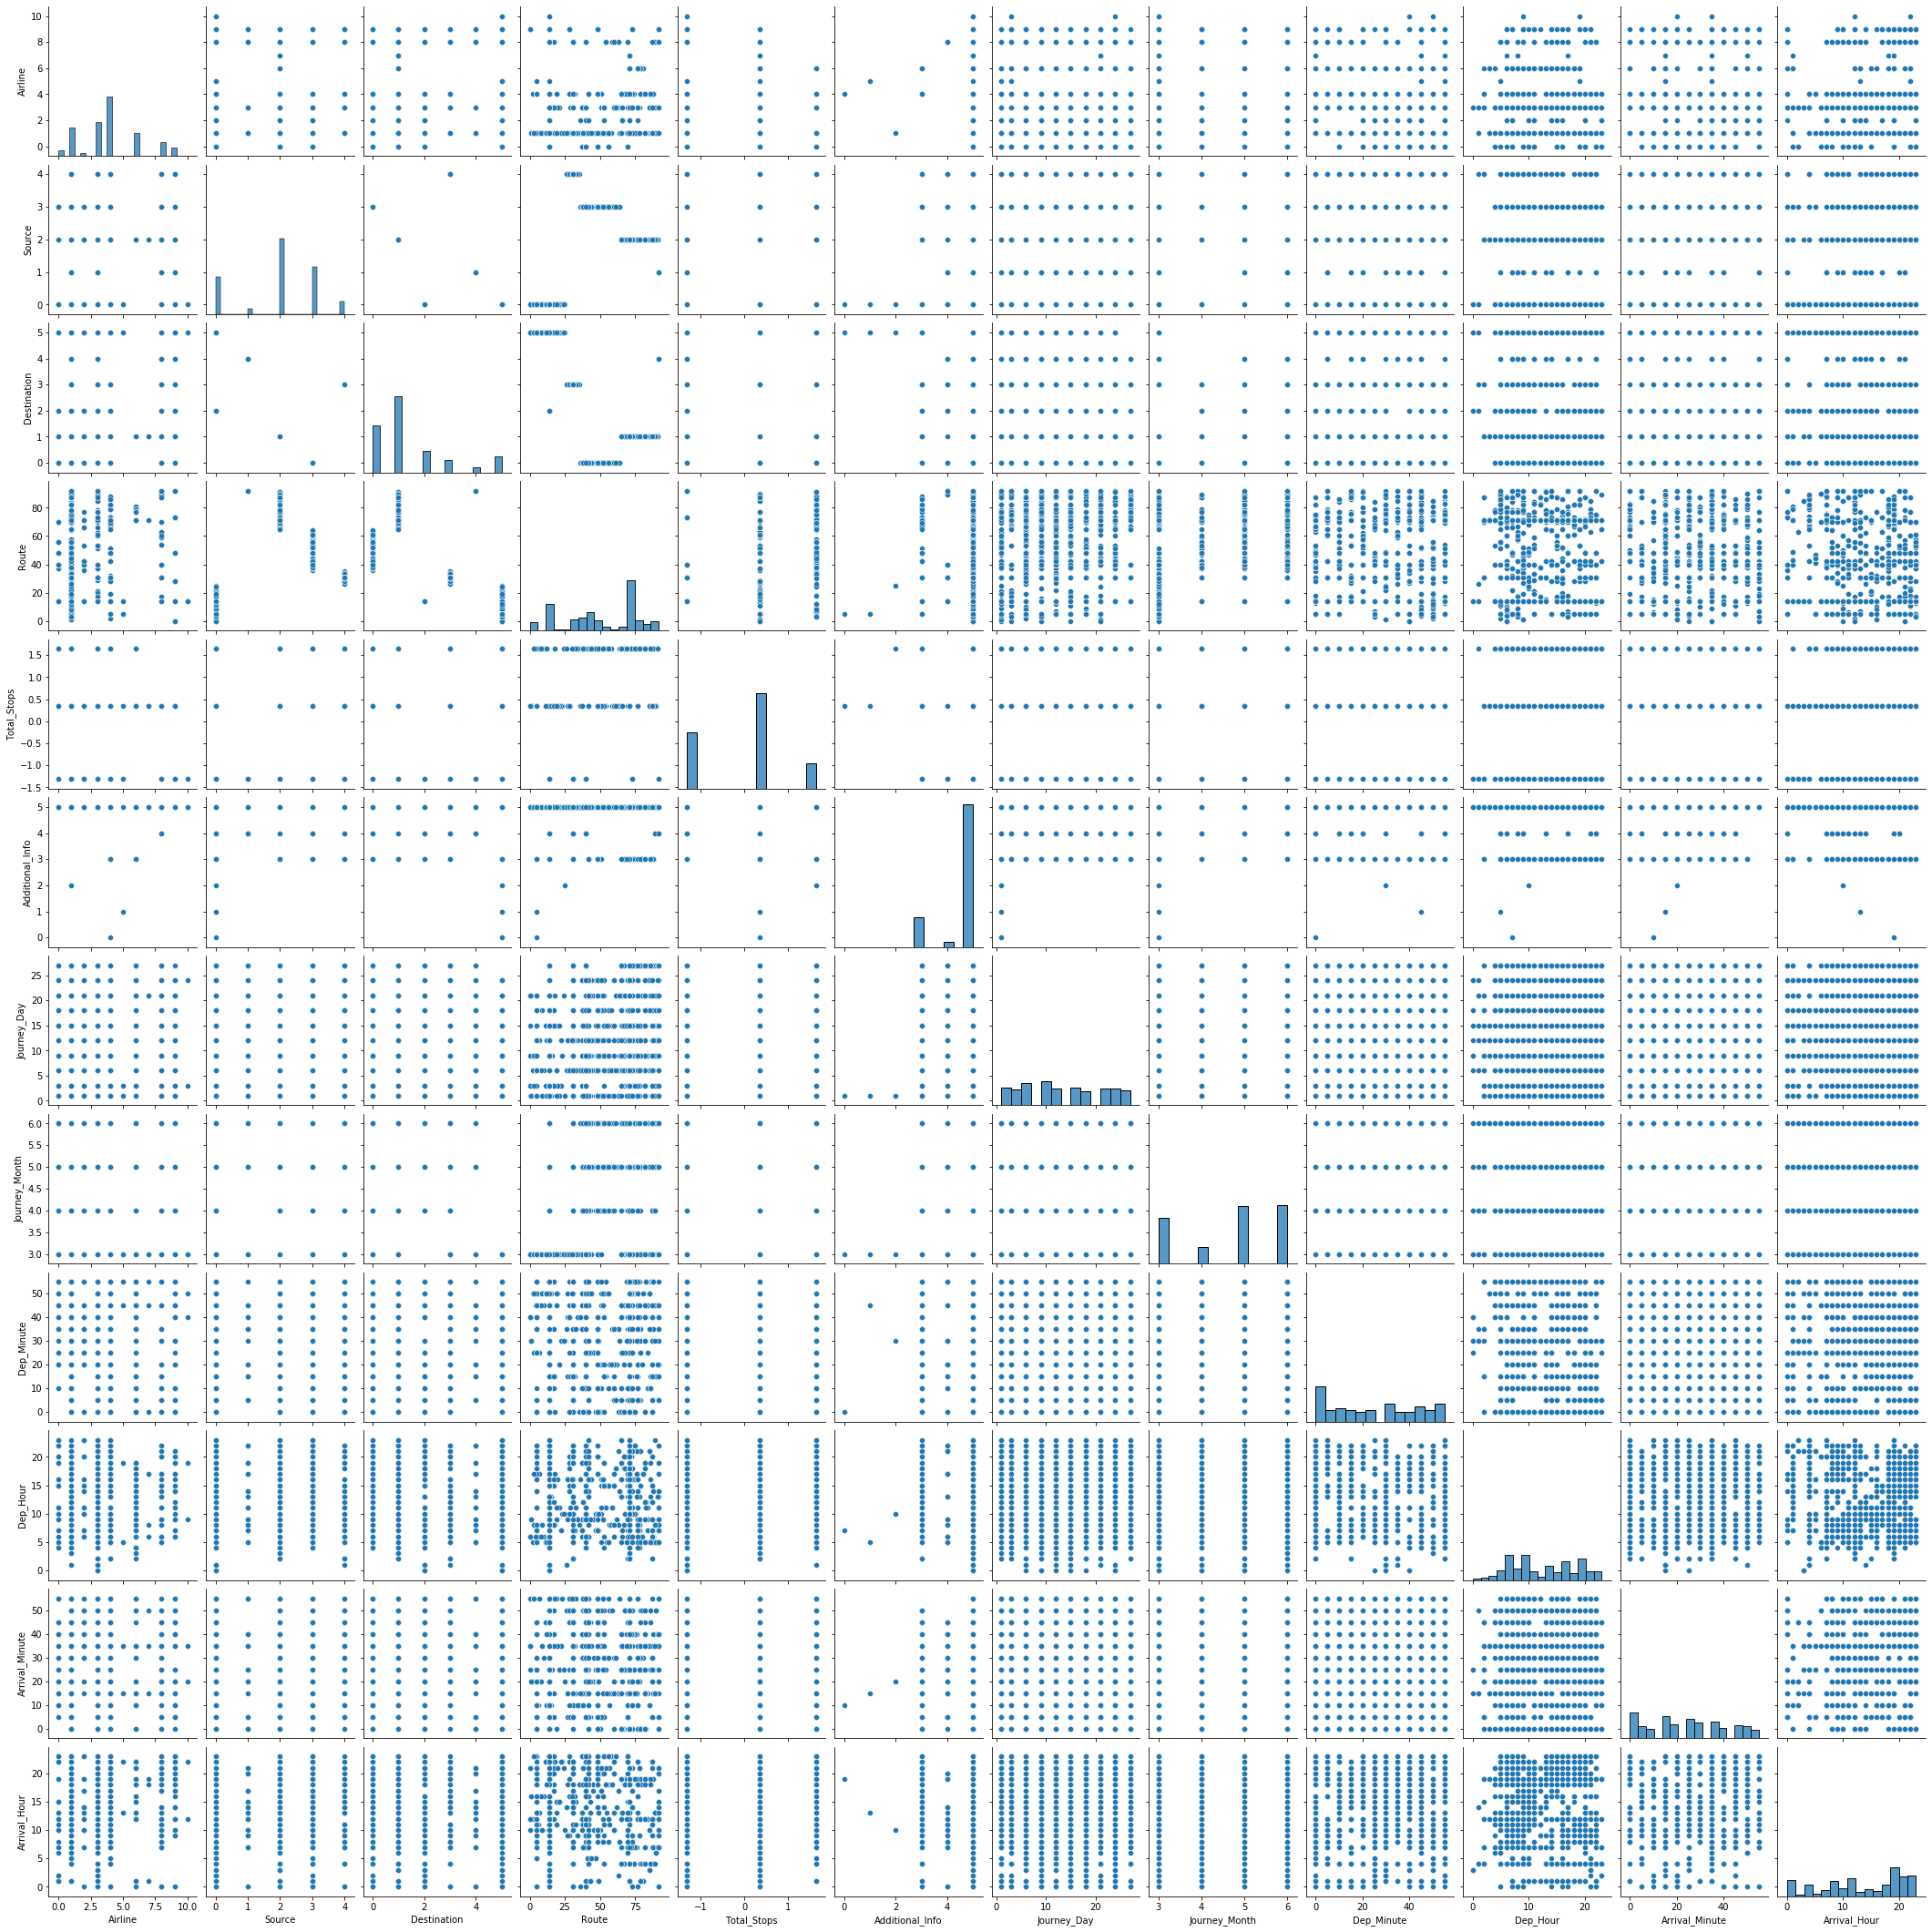

In [133]:
sns.pairplot(new_df)
plt.show()

# Scaling the data using Standard Scaler

In [134]:
sc=StandardScaler()
sc

StandardScaler()

In [135]:
x_scaled=pd.DataFrame(sc.fit_transform(new_df),columns=new_df.columns)

In [136]:
x_scaled

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Minute,Dep_Hour,Arrival_Minute,Arrival_Hour
0,0.007710,0.032693,-0.295418,0.803938,0.345942,0.481728,-0.837775,1.091986,0.268319,0.769160,0.028592,-1.362180
1,-0.428500,0.876668,-0.977290,0.371386,0.345942,0.481728,-0.110579,0.237486,-0.255706,-1.166412,-0.269547,-0.509401
2,0.007710,0.032693,-0.295418,0.803938,0.345942,-2.143096,0.980214,0.237486,-0.517718,1.121082,-1.462100,0.769767
3,0.880131,0.032693,-0.295418,0.803938,0.345942,0.481728,0.980214,0.237486,-1.303755,-0.814490,-1.462100,1.054027
4,-1.737132,-1.655257,0.386454,-1.437467,-1.315164,0.481728,1.343812,1.091986,1.578380,1.824926,1.221145,-1.646439
...,...,...,...,...,...,...,...,...,...,...,...,...
2654,-1.300921,0.876668,-0.977290,-0.100489,0.345942,0.481728,-0.837775,1.091986,0.268319,1.297043,0.028592,0.911897
2655,-0.428500,0.876668,-0.977290,-0.415072,-1.315164,0.481728,1.707410,-1.471514,-0.255706,0.241276,1.817422,0.343378
2656,0.007710,0.032693,-0.295418,0.803938,0.345942,0.481728,-0.837775,-1.471514,1.316368,1.473004,0.028592,-1.362180
2657,-1.300921,0.032693,-0.295418,0.803938,0.345942,0.481728,-0.837775,-1.471514,-1.303755,-1.518334,-0.567685,0.769767


# Variance Inflation Factor

In [137]:
vif=pd.DataFrame()
vif['Features']=x_scaled.columns
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif

,Features,VIF
0,Airline,1.097134
1,Source,1.542867
2,Destination,1.904711
3,Route,1.671543
4,Total_Stops,1.469377
5,Additional_Info,1.040645
6,Journey_Day,1.011935
7,Journey_Month,1.208652
8,Dep_Minute,1.035334
9,Dep_Hour,1.046752


There is no high inflation factor present, hence there is no mulitcollinearity present in the data set

# Model Building

In [138]:
# Splitting the data into x and y variable from training data set

x=new_df_tr.drop('Price',axis=1)
x

,Airline,Source,Destination,Route,Total_Stops,Journey_Day,Journey_Month,Dept_Minutes,Dept_Hours,Arrival Minutes,Arrival Hours
0,3,0,5,18,0,24,-0.840151,20,22,10,1
1,1,3,0,81,1,5,-1.917670,50,5,15,13
2,4,2,1,115,1,6,1.135444,25,9,25,4
3,3,3,0,88,2,5,1.849230,5,18,30,23
4,3,0,5,29,2,3,-1.917670,50,16,35,21
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,61,0,4,1.135444,55,19,25,22
10679,1,3,0,61,0,27,-0.424053,45,20,20,23
10680,4,0,2,18,0,27,-0.424053,20,8,20,11
10681,9,0,5,18,0,3,-1.917670,30,11,10,14


In [139]:
y=new_df_tr['Price']
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10587, dtype: int64

# Scaling the data

In [140]:
scaler=StandardScaler()
scaler

StandardScaler()

In [141]:
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-0.36066531, -1.67867472,  2.47372099, ...,  1.6553978 ,
        -0.8886248 , -1.80265154],
       [-1.34745008,  0.88498291, -0.97296306, ..., -1.30393592,
        -0.58611119, -0.05217908],
       [ 0.13272707,  0.03043037, -0.28362625, ..., -0.6076221 ,
         0.01891603, -1.36503342],
       ...,
       [ 0.13272707, -1.67867472,  0.40571056, ..., -0.78170056,
        -0.28359758, -0.34392449],
       [ 2.599689  , -1.67867472,  2.47372099, ..., -0.25946519,
        -0.8886248 ,  0.09369362],
       [-1.34745008,  0.03043037, -0.28362625, ..., -0.43354365,
        -0.58611119,  0.82305715]])

# VIF

In [142]:
vif=pd.DataFrame()
vif['Feature']=x.columns
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif

,Feature,VIF
0,Airline,1.010143
1,Source,1.582561
2,Destination,1.744588
3,Route,1.467073
4,Total_Stops,1.284281
5,Journey_Day,1.058516
6,Journey_Month,1.050541
7,Dept_Minutes,1.023555
8,Dept_Hours,1.027214
9,Arrival Minutes,1.094221


There is no high variance inflation factor. We are good to proceed.

# Checking the best Random state

In [143]:
max_accu=0
max_RS=0
for i in range(1,100):
    train_x,test_x,train_y,test_y=train_test_split(x_scaled,y,test_size=.30,random_state=i)
    rf=RandomForestRegressor()
    rf.fit(train_x,train_y)
    rf_pred=rf.predict(test_x)
    accuracy=r2_score(test_y,rf_pred)
    if accuracy>max_accu:
        max_acc=accuracy
        max_RS=i
print("Accuracy score is",max_accu,"On Random State:",max_RS)

Accuracy score is 0 On Random State: 99


# Principle Component Analysis

In [288]:
pca=PCA(n_components=8)


In [289]:
pca.fit(train_x,train_y)

PCA(n_components=8)

In [290]:
pca.explained_variance_

array([2.24529283, 1.2822123 , 1.21272044, 1.06013423, 1.01143958,
       0.91416657, 0.85954693, 0.79825407])

In [291]:
pca.components_

array([[ 0.00530327, -0.48689106,  0.54120329, -0.49993314, -0.41966912,
        -0.02097715, -0.08685617,  0.11428322, -0.00941512,  0.13407812,
        -0.0695872 ],
       [-0.20353368,  0.27134294, -0.2195387 , -0.13111763, -0.24014558,
        -0.11137387,  0.08733354, -0.16159368,  0.39059696,  0.63954906,
        -0.39262614],
       [-0.1619964 , -0.04307903,  0.03866346, -0.0988095 ,  0.1214795 ,
        -0.68340222,  0.64018768,  0.20582242,  0.03694325, -0.09205174,
         0.12963739],
       [ 0.56203974, -0.11962896,  0.06212885,  0.06456693,  0.0373607 ,
        -0.1465736 ,  0.25092868, -0.51751955, -0.27729224, -0.03728863,
        -0.47939399],
       [ 0.36056638, -0.03601052, -0.03642492, -0.18808025, -0.03130014,
         0.00469477,  0.03812126, -0.37033142,  0.68540641, -0.18215501,
         0.43523722],
       [ 0.582162  ,  0.17778478, -0.07571245,  0.03669594, -0.1712085 ,
         0.14345751,  0.15782278,  0.69157884,  0.18039068, -0.0218788 ,
        -0.190

# Linear Regression

In [144]:
lr=LinearRegression()
lr.fit(train_x,train_y)

LinearRegression()

In [146]:
lr_pred=lr.predict(test_x)
print("Predicted value:\n",lr_pred)

Predicted value:
 [10898.06827527 15972.53352194  5694.37679521 ... 10250.41060279
 11106.41615735 10289.38928254]


In [147]:
lr.coef_

array([-106.31049754, -364.92426919,  -28.30184698,  304.44823394,
       2191.35971076, -490.38667041,   27.53132822,  -68.21326463,
        128.21272606,   93.33247004,  -50.15158717])

In [148]:
lr.intercept_

8847.852277246091

In [149]:
lr.score(test_x,test_y)

0.34443224619051205

In [154]:
print("R2 Score is",r2_score(test_y,lr_pred))
print("Mean Squared Error(MSE) is:",mean_squared_error(test_y,lr_pred))
print("Mean Absolute Error(MAE) is",mean_absolute_error(test_y,lr_pred))

R2 Score is 0.34443224619051205
Mean Squared Error(MSE) is: 10997458.91473307
Mean Absolute Error(MAE) is 2653.81559230307


# Random Forest Regressor

In [151]:
rf=RandomForestRegressor()
rf.fit(train_x,train_y)

RandomForestRegressor()

In [155]:
rf_pred=rf.predict(test_x)
print("Predicted value:\n",rf_pred)

Predicted value:
 [11281.88       12854.98        2235.73       ... 11291.54
  7003.44       13226.41333333]


In [156]:
print("R2 Score is:",r2_score(test_y,rf_pred))
print("Mean Squared Error(MSE) is",mean_squared_error(test_y,rf_pred))
print("Mean Absolute Error(MAE) is",mean_absolute_error(test_y,rf_pred))

R2 Score is: 0.8206830717745861
Mean Squared Error(MSE) is 3008126.2225234644
Mean Absolute Error(MAE) is 1117.1982411109157


# KNeighborsRegressor

In [169]:
knn=KNeighborsRegressor()
knn.fit(train_x,train_y)

KNeighborsRegressor()

In [170]:
knn_pred=knn.predict(test_x)
print("Predicted value:\n",knn_pred)

Predicted value:
 [12405.4 12619.6  4382.  ... 10087.4  9700.8 11325.2]


In [171]:
print("R2 Score is:",r2_score(test_y,knn_pred))
print("Mean Squared Error(MSE) is",mean_squared_error(test_y,knn_pred))
print("Mean Absolute Error(MAE) is",mean_absolute_error(test_y,knn_pred))

R2 Score is: 0.6856994943372963
Mean Squared Error(MSE) is 5272539.532061693
Mean Absolute Error(MAE) is 1616.8919106074916


# Decision Tree Regressor

In [172]:
dtr=DecisionTreeRegressor()
dtr.fit(train_x,train_y)

DecisionTreeRegressor()

In [173]:
dtr_pred=dtr.predict(test_x)
print("Predicted value:\n",dtr_pred)

Predicted value:
 [10539. 12346.  2227. ... 11087.  7191. 14067.]


In [174]:
print("R2 Score is:",r2_score(test_y,dtr_pred))
print("Mean Squared Error(MSE) is",mean_squared_error(test_y,dtr_pred))
print("Mean Absolute Error(MAE) is",mean_absolute_error(test_y,dtr_pred))

R2 Score is: 0.7332170496090775
Mean Squared Error(MSE) is 4475410.083895097
Mean Absolute Error(MAE) is 1262.8452680726052


# Gradient Boosting Regressor

In [175]:
gbr=GradientBoostingRegressor()
gbr.fit(train_x,train_y)

GradientBoostingRegressor()

In [176]:
gbr_pred=gbr.predict(test_x)
print("Predicted value:\n",gbr_pred)

Predicted value:
 [11833.24830613 13182.47818038  3072.26850969 ... 11376.736893
  6826.55810753 10307.00668994]


In [177]:
print("R2 Score is:",r2_score(test_y,gbr_pred))
print("Mean Squared Error(MSE) is",mean_squared_error(test_y,gbr_pred))
print("Mean Absolute Error(MAE) is",mean_absolute_error(test_y,gbr_pred))

R2 Score is: 0.7816958756599338
Mean Squared Error(MSE) is 3662154.864078842
Mean Absolute Error(MAE) is 1432.4406844816813


# XGBRegressor

In [179]:
from xgboost import XGBRegressor

In [180]:
xgb=XGBRegressor()
xgb.fit(train_x,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [181]:
xgb_pred=xgb.predict(test_x)
print("Predicted value:\n",xgb_pred)

Predicted value:
 [11266.519  12277.357   2373.2336 ... 11334.145   6982.183  11100.728 ]


In [182]:
print("R2 Score is:",r2_score(test_y,xgb_pred))
print("Mean Squared Error(MSE) is",mean_squared_error(test_y,xgb_pred))
print("Mean Absolute Error(MAE) is",mean_absolute_error(test_y,xgb_pred))

R2 Score is: 0.8527612164516709
Mean Squared Error(MSE) is 2470000.1842961134
Mean Absolute Error(MAE) is 1085.8842392279962


# SGDRegressor

In [183]:
from sklearn.linear_model import SGDRegressor

In [184]:
sgd=SGDRegressor()
sgd.fit(train_x,train_y)

SGDRegressor()

In [185]:
sgd_pred=sgd.predict(test_x)
print("Predicted value:\n",sgd_pred)

Predicted value:
 [10845.44191156 15840.5654994   5704.55746051 ... 10121.90503282
 11191.39877161 10411.90056821]


In [186]:
print("R2 Score is:",r2_score(test_y,sgd_pred))
print("Mean Squared Error(MSE) is",mean_squared_error(test_y,sgd_pred))
print("Mean Absolute Error(MAE) is",mean_absolute_error(test_y,sgd_pred))

R2 Score is: 0.34468381724326214
Mean Squared Error(MSE) is 10993238.691421783
Mean Absolute Error(MAE) is 2650.363562201153


In [187]:
from sklearn.tree import ExtraTreeRegressor

# Extra Tree Regressor

In [188]:
etr=ExtraTreeRegressor()
etr.fit(train_x,train_y)

ExtraTreeRegressor()

In [189]:
etr_pred=etr.predict(test_x)
print("Predicted value:\n",etr_pred)

Predicted value:
 [10539. 12346.  2227. ... 11087.  7191. 14067.]


In [190]:
print("R2 Score is:",r2_score(test_y,etr_pred))
print("Mean Squared Error(MSE) is",mean_squared_error(test_y,etr_pred))
print("Mean Absolute Error(MAE) is",mean_absolute_error(test_y,etr_pred))

R2 Score is: 0.7220427862066423
Mean Squared Error(MSE) is 4662863.633824276
Mean Absolute Error(MAE) is 1294.82071660896


# Ada Boost Regressor

In [193]:
from sklearn.ensemble import AdaBoostRegressor

In [194]:
ada=AdaBoostRegressor()
ada.fit(train_x,train_y)

AdaBoostRegressor()

In [195]:
ada_pred=ada.predict(test_x)
print("Predicted value:\n",ada_pred)

Predicted value:
 [11207.38358516 14962.33176839  6355.33018868 ... 12914.41037736
 10064.87150976 11207.38358516]


In [196]:
print("R2 Score is:",r2_score(test_y,ada_pred))
print("Mean Squared Error(MSE) is",mean_squared_error(test_y,ada_pred))
print("Mean Absolute Error(MAE) is",mean_absolute_error(test_y,ada_pred))

R2 Score is: 0.5921329166524549
Mean Squared Error(MSE) is 6842163.095609108
Mean Absolute Error(MAE) is 2183.680546767965


# Gaussian NB

In [197]:
from sklearn.naive_bayes import GaussianNB

In [198]:
gnb=GaussianNB()
gnb.fit(train_x,train_y)

GaussianNB()

In [199]:
gnb_pred=gnb.predict(test_x)
print("Predicted value:\n",gnb_pred)

Predicted value:
 [ 8066  7646  2754 ... 12284  5894  7618]


In [200]:
print("R2 Score is:",r2_score(test_y,gnb_pred))
print("Mean Squared Error(MSE) is",mean_squared_error(test_y,gnb_pred))
print("Mean Absolute Error(MAE) is",mean_absolute_error(test_y,gnb_pred))

R2 Score is: 0.6446988021317952
Mean Squared Error(MSE) is 5960345.522190746
Mean Absolute Error(MAE) is 1479.09537299339


# Bagging Regressor

In [201]:
from sklearn.ensemble import BaggingRegressor

In [202]:
br=BaggingRegressor()
br.fit(train_x,train_y)

BaggingRegressor()

In [203]:
br_pred=br.predict(test_x)
print("Predicted value:\n",br_pred)

Predicted value:
 [10570.8  12665.6   2227.   ... 11206.7   7085.   13529.45]


In [204]:
print("R2 Score is:",r2_score(test_y,br_pred))
print("Mean Squared Error(MSE) is",mean_squared_error(test_y,br_pred))
print("Mean Absolute Error(MAE) is",mean_absolute_error(test_y,br_pred))

R2 Score is: 0.8088667918578396
Mean Squared Error(MSE) is 3206349.9029199993
Mean Absolute Error(MAE) is 1147.0930811487326


In [207]:
for rg in (lr,dtr,knn,gnb,sgd,etr,ada,gbr,br,rf,xgb):
    rg.fit(train_x,train_y)
    rg_pred=rg.predict(test_x)
    print(rg.__class__.__name__,r2_score(test_y,rg_pred))

LinearRegression 0.34443224619051205
DecisionTreeRegressor 0.7321709550504658
KNeighborsRegressor 0.6856994943372963
GaussianNB 0.6446988021317952
SGDRegressor 0.342433082872978
ExtraTreeRegressor 0.7138249552256084
AdaBoostRegressor 0.584817844874093
GradientBoostingRegressor 0.7816633203937057
BaggingRegressor 0.8084347757314796
RandomForestRegressor 0.8180765697555633
XGBRegressor 0.8527612164516709


Analysis Various model, XGB Regressor model gives a good score 85%

# Cross Validation

In [213]:
# Cross Validation for Linear Regression
print("Cross Validation od Linear Regression:",cross_val_score(lr,x,y,cv=5).mean())

Cross Validation od Linear Regression: 0.33285620498580987


In [214]:
# Cross Validation for Decision Tree Regressor
print("Cross Validation of Decision Tree Regressor:",cross_val_score(dtr,x,y,cv=5).mean())

Cross Validation of Decision Tree Regressor: 0.7287610350618152


In [215]:
# Cross Validation for KNeighbors Regressor
print("Cross Validation of KNeighbors Regressor:",cross_val_score(knn,x,y,cv=5).mean())

Cross Validation of KNeighbors Regressor: 0.6920450311765971


In [216]:
# Cross Validation for Extra Tree Regressor
print("Cross Validation of Extra Tree Regressor:",cross_val_score(etr,x,y,cv=5).mean())

Cross Validation of Extra Tree Regressor: 0.7131330112361497


In [217]:
# Cross Validation for Ada Boost Regressor
print("Cross Validation of Ada Boost Regressor:",cross_val_score(ada,x,y,cv=5).mean())

Cross Validation of Ada Boost Regressor: 0.5943208585543085


In [218]:
# Cross Validation for Grandient Boosting Regressor
print("Cross Validation of Gradient Boosting Regressor:",cross_val_score(gbr,x,y,cv=5).mean())

Cross Validation of Gradient Boosting Regressor: 0.7845047879918825


In [222]:
# Cross Validation for Gaussian NB
print("Cross Validation of Gaussian NB:",cross_val_score(gnb,x,y,cv=5).mean())

Cross Validation of Gaussian NB: 0.27939848423415287


In [219]:
# Cross Validation for Random Forest Regressor
print("Cross Validation of Random Forest Regressor:",cross_val_score(rf,x,y,cv=5).mean())

Cross Validation of Random Forest Regressor: 0.8214149446762165


In [220]:
# Cross Validation for Bagging Regressor
print("Cross Validation of Bagging Regressor:",cross_val_score(br,x,y,cv=5).mean())

Cross Validation of Bagging Regressor: 0.8134627637790576


In [221]:
# Cross Validation for XGB Regressor
print("Cross Validation of XGB Regressor:",cross_val_score(xgb,x,y,cv=5).mean())

Cross Validation of XGB Regressor: 0.8618912318099585


After analysis of various model and cross validation of each model, XGB gives a good score and cross validation score. I choose XGB Regressor model as my final mode. Let's do the hyper parameter tuning to improve the accuracy

# Hyper Parameter Tuning

In [229]:
params={'n_estimators':[10,50,100],
       'max_depth':[2,4,6],
       'learning_rate':[0.1,0.001,0.01],
       'n_jobs':[-2,-1,1]}

In [230]:
from sklearn.model_selection import GridSearchCV

In [231]:
grid_search=GridSearchCV(estimator=xgb,param_grid=params,cv=3,verbose=3)

In [232]:
grid_search.fit(train_x,train_y)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV 1/3] END learning_rate=0.1, max_depth=2, n_estimators=10, n_jobs=-2;, score=-0.075 total time=   0.0s
[CV 2/3] END learning_rate=0.1, max_depth=2, n_estimators=10, n_jobs=-2;, score=-0.140 total time=   0.0s
[CV 3/3] END learning_rate=0.1, max_depth=2, n_estimators=10, n_jobs=-2;, score=-0.078 total time=   0.0s
[CV 1/3] END learning_rate=0.1, max_depth=2, n_estimators=10, n_jobs=-1;, score=-0.075 total time=   0.0s
[CV 2/3] END learning_rate=0.1, max_depth=2, n_estimators=10, n_jobs=-1;, score=-0.140 total time=   0.0s
[CV 3/3] END learning_rate=0.1, max_depth=2, n_estimators=10, n_jobs=-1;, score=-0.078 total time=   0.0s
[CV 1/3] END learning_rate=0.1, max_depth=2, n_estimators=10, n_jobs=1;, score=-0.075 total time=   0.0s
[CV 2/3] END learning_rate=0.1, max_depth=2, n_estimators=10, n_jobs=1;, score=-0.140 total time=   0.0s
[CV 3/3] END learning_rate=0.1, max_depth=2, n_estimators=10, n_jobs=1;, score=-0.078 total 

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1,
                                    enable_categorical=False, gamma=0,
                                    gpu_id=-1, importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=4,
                                    num_parallel_tree=1, predictor='auto',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', vali

In [234]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'n_jobs': -2}

In [235]:
grid_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-2,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [236]:
grid_search.best_score_

0.8378553075199578

# Final Model

In [246]:
final_model=XGBRegressor(learning_rate=0.1,max_depth=6,n_estimators=100,n_jobs=-2)

In [247]:
final_model.fit(train_x,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-2,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [248]:
final_model_pred=final_model.predict(test_x)
print("Predicted value:\n",final_model_pred)

Predicted value:
 [11626.998 12785.465  2588.836 ... 11329.932  6757.271 11280.571]


In [249]:
print("R2 Score is:",r2_score(test_y,final_model_pred))
print("Mean Squared Error(MSE) is",mean_squared_error(test_y,final_model_pred))
print("Mean Absolute Error(MAE) is",mean_absolute_error(test_y,final_model_pred))

R2 Score is: 0.8417748270134372
Mean Squared Error(MSE) is 2654302.059679912
Mean Absolute Error(MAE) is 1167.5103165743897


After tuning I got r2 score in XGB is 84%

# Saving the Model

In [260]:
import pickle

In [261]:
filename='Flightpriceprediction.pickle'

In [262]:
pickle.dump(final_model,open(filename,'wb'))

In [274]:
loaded_model=pickle.load(open(filename,'rb'))
prediction=loaded_model.predict(test_x)
print("Predicted value:\n",prediction)

Predicted value:
 [11626.998 12785.465  2588.836 ... 11329.932  6757.271 11280.571]


In [265]:
loaded_model.score(train_x,train_y)

0.8852421343711259

In [266]:
loaded_model.score(test_x,test_y)

0.8417748270134372

In [272]:
df=pd.DataFrame([loaded_model.predict(test_x)[:],test_y[:]],index=['Predicted','Actual'])
df

,0,1,2,3,4,5,6,7,8,9,...,3167,3168,3169,3170,3171,3172,3173,3174,3175,3176
Predicted,11626.998047,12785.464844,2588.835938,7119.51123,4633.205566,5701.789062,6636.030273,11004.753906,5460.554199,11731.207031,...,11721.424805,7486.913574,10575.373047,4619.496582,7765.324707,4023.946045,6393.370605,11329.931641,6757.270996,11280.571289
Actual,10953.000000,17686.000000,2227.000000,10188.00000,4050.000000,6297.000000,7514.000000,8273.000000,6860.000000,10661.000000,...,10262.000000,8016.000000,8839.000000,4804.000000,8907.000000,3971.000000,6442.000000,13555.000000,7191.000000,7888.000000


Here is the predicted and actual value of flight price prediction.

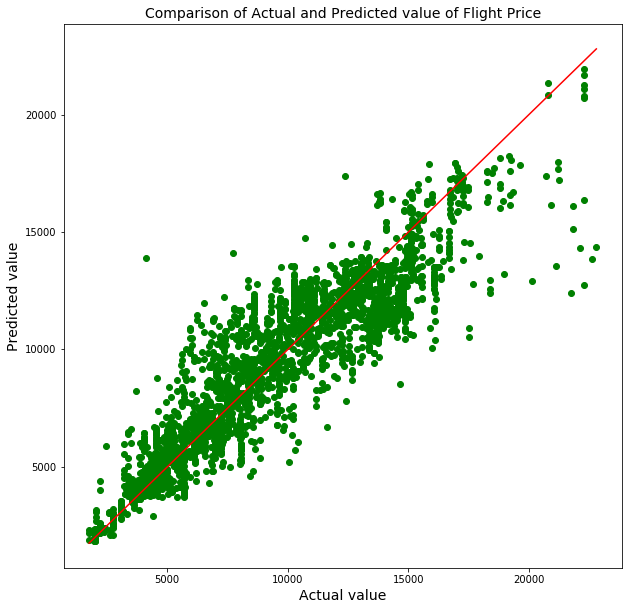

In [283]:
plt.figure(figsize=(10,10))
plt.scatter(test_y,prediction,color='green')
plt.xlabel('Actual value',fontsize=14)
plt.ylabel('Predicted value',fontsize=14)
p1=max(max(prediction),max(test_y))
p2=min(min(prediction),min(test_y))
plt.plot([p1,p2],[p1,p2],color='red')
plt.title("Comparison of Actual and Predicted value of Flight Price",fontsize=14)
plt.show()

In [284]:
df.to_csv("Flight_Price_Prediction.csv")

 In the Analysis we observe that Many people used to travel in Jet Airway, People from Delhi, Cochi are travelling most in Flight. Most expensive flight is Jet Airway Business. For long distance the flight price is expensive. 